<a href="https://colab.research.google.com/github/RohithMacharla11/-AI-Driven-Recruitment-Pipeline/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# /content/drive/MyDrive/Approved_datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
file_paths = glob.glob('/content/drive/MyDrive/Approved_datasets/*.xlsx')  # Adjust path if needed
datasets = [pd.read_excel(path) for path in file_paths]
final_data = pd.concat(datasets, ignore_index=True)

In [4]:
final_data.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,harima1,Ishan,Data Scientist,"Interviewer: Hi Ishan, thanks for applying for...",**Ishan**\n**Contact Information:**\n\n* Addre...,rejected,The candidate did not demonstrate strong compe...,Looking for a skilled Data Scientist with at l...
1,harima2,Rajiv,Data Analyst,"**Interviewer:** Hi Rajiv, thanks for coming i...",**Rajiv**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in Python/R, Dashboards creat...",Seeking a talented Data Analyst with 4 years o...
2,harima3,Oliver,Software Engineer,"Interviewer: Hi Oliver, thanks for taking the ...",**Oliver**\n**Software Engineer**\n\n**Contact...,selected,The combination of 5 years of experience and p...,Seeking a talented Software Engineer with 5 ye...
3,harima4,Aarav,Product Manager,"**Interviewer:** Hi Aarav, thank you for comin...",**Aarav**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in KPI monitoring, Business s...",Seeking a talented Product Manager with 8 year...
4,harima5,Sonia,Software Engineer,"Interviewer: Hi Sonia, thanks for coming in to...",**Sonia**\n**Contact Information:**\n\n* Email...,rejected,The candidate lacked sufficient expertise in k...,Looking for a skilled Software Engineer with a...


In [5]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   3250 non-null   object
 1   Name                 3250 non-null   object
 2   Role                 3250 non-null   object
 3   Transcript           3250 non-null   object
 4   Resume               3250 non-null   object
 5   decision             3250 non-null   object
 6   Reason for decision  3250 non-null   object
 7   Job Description      3250 non-null   object
dtypes: object(8)
memory usage: 203.3+ KB


In [6]:
# Step 2: Data Cleaning
# Standardize column names
final_data.columns = [col.strip().lower().replace(" ", "_") for col in final_data.columns]

# Handle missing values
final_data.fillna("Unknown", inplace=True)

# Remove duplicates
final_data.drop_duplicates(inplace=True)

In [7]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description
0,harima1,Ishan,Data Scientist,"Interviewer: Hi Ishan, thanks for applying for...",**Ishan**\n**Contact Information:**\n\n* Addre...,rejected,The candidate did not demonstrate strong compe...,Looking for a skilled Data Scientist with at l...
1,harima2,Rajiv,Data Analyst,"**Interviewer:** Hi Rajiv, thanks for coming i...",**Rajiv**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in Python/R, Dashboards creat...",Seeking a talented Data Analyst with 4 years o...
2,harima3,Oliver,Software Engineer,"Interviewer: Hi Oliver, thanks for taking the ...",**Oliver**\n**Software Engineer**\n\n**Contact...,selected,The combination of 5 years of experience and p...,Seeking a talented Software Engineer with 5 ye...
3,harima4,Aarav,Product Manager,"**Interviewer:** Hi Aarav, thank you for comin...",**Aarav**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in KPI monitoring, Business s...",Seeking a talented Product Manager with 8 year...
4,harima5,Sonia,Software Engineer,"Interviewer: Hi Sonia, thanks for coming in to...",**Sonia**\n**Contact Information:**\n\n* Email...,rejected,The candidate lacked sufficient expertise in k...,Looking for a skilled Software Engineer with a...


In [8]:
# Step 3: Data Preprocessing
# Convert decision to categorical type
final_data['decision'] = final_data['decision'].astype('category')

In [9]:
# Encode categorical variables if needed
# final_data = pd.get_dummies(final_data, columns=['decision', 'role'], drop_first=True)


In [10]:
final_data['decision'] = final_data['decision'].str.lower()  # Convert to lowercase
final_data['decision'] = final_data['decision'].replace({
    'select': 'select',
    'selected': 'select',
    'reject': 'reject',
    'rejected': 'reject'
})


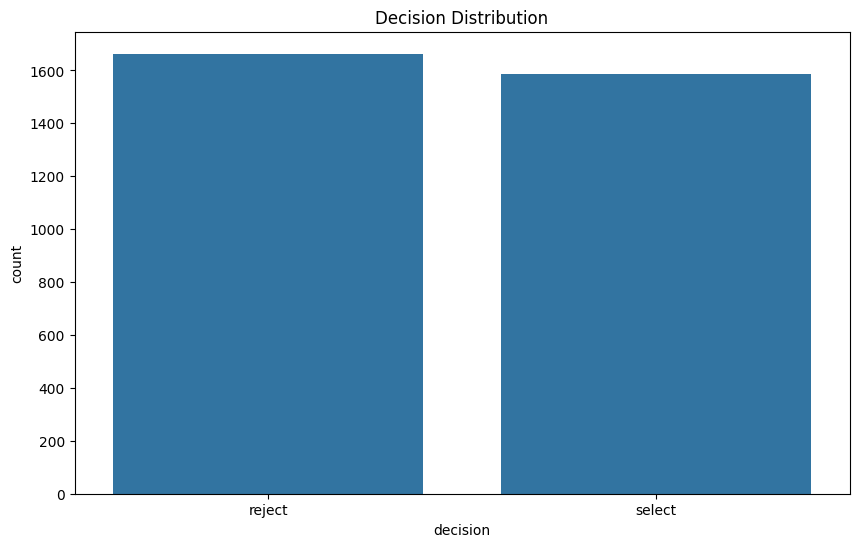

In [11]:
# Step 4: Exploratory Data Analysis
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='decision')
plt.title("Decision Distribution")
plt.show()


In [12]:
# Display all unique roles in the 'roles' column
unique_roles = final_data['role'].unique()
print(unique_roles)


['Data Scientist' 'Data Analyst' 'Software Engineer' 'Product Manager'
 'Data Engineer' 'UI Designer' 'Project Manager' 'Software Developer'
 'UI Engineer' 'Digital Marketing Specialist' 'Cybersecurity Specialist'
 'HR Specialist' 'Network Engineer' 'Graphic Designer' 'Game Developer'
 'Mobile App Developer' 'Cloud Architect' 'Business Analyst'
 'Database Administrator' 'DevOps Engineer' 'Machine Learning Engineer'
 'Content Writer' 'System Administrator' 'UI/UX Designer' 'AI Engineer']


In [13]:
# Mapping dictionary for grouping roles
role_mapping = {
    'Software Developer': 'Software Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Engineer': 'Data Analyst',
    'Data Analyst': 'Data Analyst',
    'UI/UX Designer': 'UI/UX Designer',
    'UI Engineer': 'UI/UX Designer',
    'UI Designer': 'UI/UX Designer',
    'Cybersecurity Specialist': 'Cybersecurity Specialist',
    'Network Engineer': 'Cybersecurity Specialist',
    'Cloud Architect': 'Cloud Architect',
    'DevOps Engineer': 'Cloud Architect',
    'AI Engineer': 'AI Engineer',
    'Machine Learning Engineer': 'AI Engineer',
    'System Administrator': 'System Administrator',
    'Database Administrator': 'System Administrator',
    'Digital Marketing Specialist': 'Digital Marketing Specialist',
    'Content Writer': 'Digital Marketing Specialist',
    'Graphic Designer': 'Mobile Game Developer',
    'Game Developer': 'Mobile Game Developer',
    'Mobile App Developer': 'Mobile Game Developer',
    'HR Specialis': 'Digital Marketing Specialist',
    'HR Specialist' : 'Digital Marketing Specialist',
    'Project Manager' : 'System Administrator'
}


In [14]:
# Apply the mapping to group roles
final_data['role'] = final_data['role'].replace(role_mapping)

# Check the unique values after grouping
print(final_data['role'].unique())


['Data Scientist' 'Data Analyst' 'Software Engineer' 'Product Manager'
 'UI/UX Designer' 'System Administrator' 'Digital Marketing Specialist'
 'Cybersecurity Specialist' 'Mobile Game Developer' 'Cloud Architect'
 'Business Analyst' 'AI Engineer']


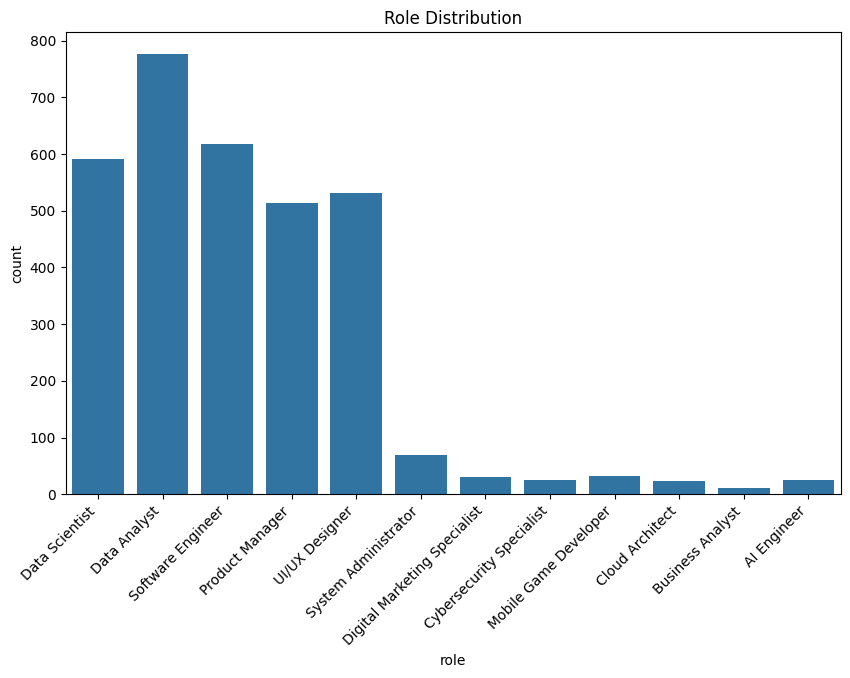

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='role')
plt.title("Role Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.show()


In [16]:
# Calculate the number of words in the 'Transcript' column
final_data['num_words_in_transcript'] = final_data['transcript'].apply(lambda x: len(str(x).split()))


In [17]:
# Group by Role and decision and calculate mean, median, and standard deviation
aggregated_data = final_data.groupby(['role', 'decision'])['num_words_in_transcript'].agg(['mean', 'median', 'std']).reset_index()


In [18]:
print(aggregated_data)

                            role decision        mean  median         std
0                    AI Engineer   reject  614.545455   584.0   84.985132
1                    AI Engineer   select  732.933333   754.0  172.415804
2               Business Analyst   reject  616.400000   578.0  110.323615
3               Business Analyst   select  693.833333   693.5   54.802980
4                Cloud Architect   reject  594.375000   621.0   65.038313
5                Cloud Architect   select  722.312500   718.5   64.263747
6       Cybersecurity Specialist   reject  586.733333   553.0  109.979522
7       Cybersecurity Specialist   select  748.000000   771.0   68.593812
8                   Data Analyst   reject  662.442543   657.0  128.670872
9                   Data Analyst   select  750.313351   758.0  124.340171
10                Data Scientist   reject  660.835526   653.0  125.954125
11                Data Scientist   select  733.187500   728.5  135.307700
12  Digital Marketing Specialist   rej

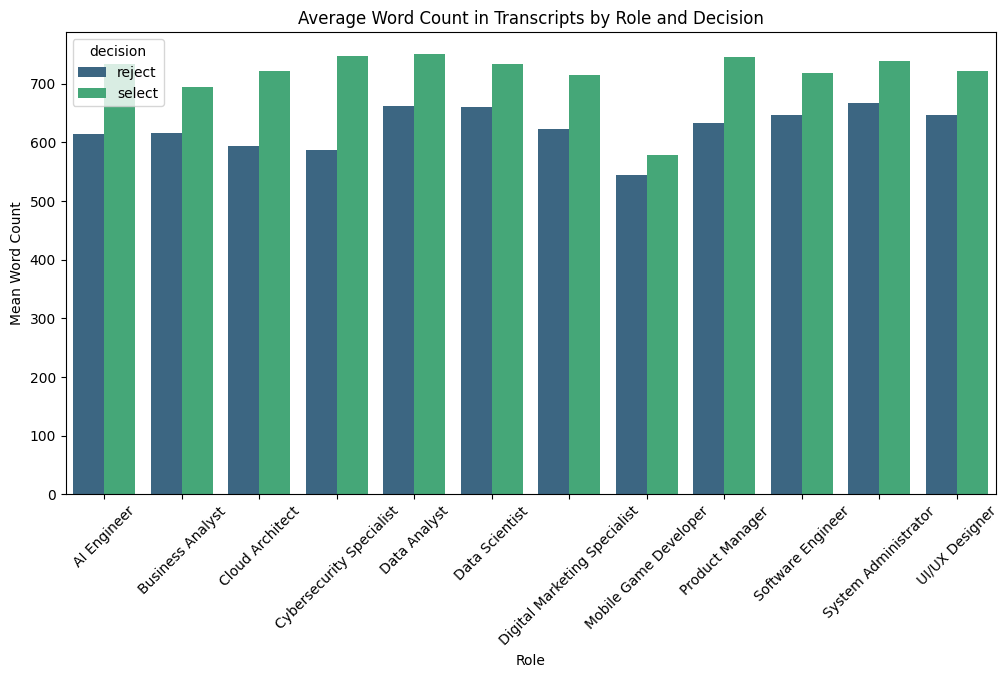

In [19]:
# Bar plot for mean word count by Role and decision
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='role', y='mean', hue='decision', palette='viridis')
plt.title('Average Word Count in Transcripts by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Mean Word Count')
plt.xticks(rotation=45)
plt.show()


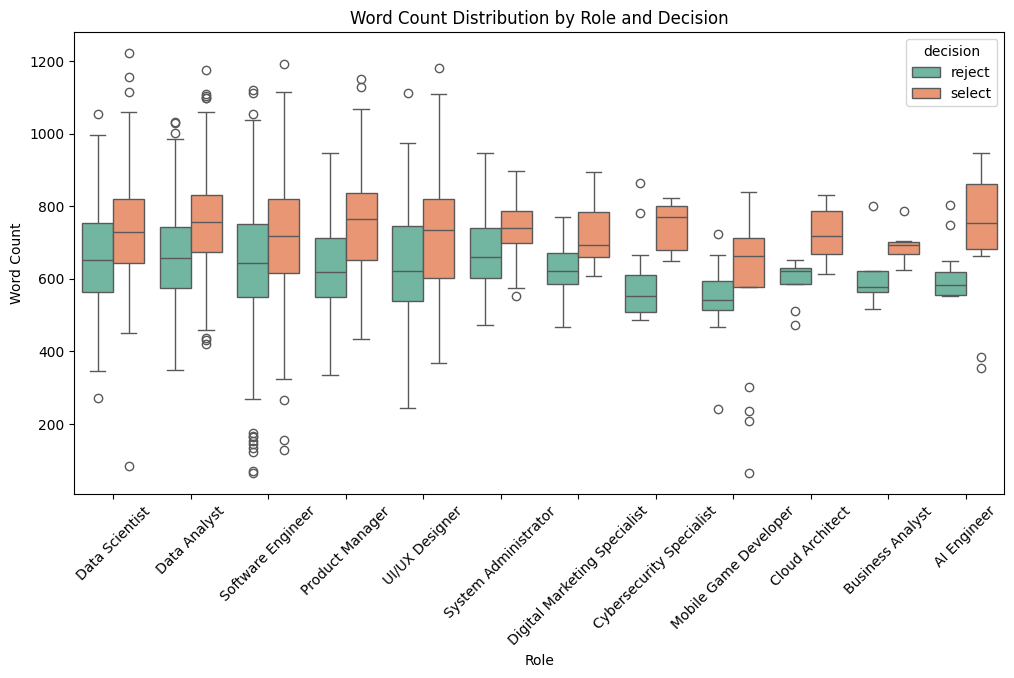

In [20]:
# Box plot for distribution of word count by Role and decision
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='role', y='num_words_in_transcript', hue='decision', palette='Set2')
plt.title('Word Count Distribution by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()


**Word Count as a Predictor:**

1. Longer and more detailed responses correlate with a higher likelihood of selection for most roles.
2. Specific roles, such as AI Engineer, Product Manager, and Cybersecurity Specialist, show the strongest positive correlation between word count and selection.
3. Roles like Mobile Game Developer require less detail overall, as both selected and rejected candidates tend to have lower word counts.
4. Roles like Product Manager and AI Engineer place a premium on detailed responses.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
for col in ['transcript', 'resume', 'reason_for_decision', 'job_description']:
    final_data[col] = final_data[col].apply(preprocess_text)

In [23]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570


In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       3250 non-null   object
 1   name                     3250 non-null   object
 2   role                     3250 non-null   object
 3   transcript               3250 non-null   object
 4   resume                   3250 non-null   object
 5   decision                 3250 non-null   object
 6   reason_for_decision      3250 non-null   object
 7   job_description          3250 non-null   object
 8   num_words_in_transcript  3250 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 228.6+ KB


In [25]:
# Feature: Word count
final_data['transcript_word_count'] = final_data['transcript'].apply(lambda x: len(str(x).split()))
final_data['resume_word_count'] = final_data['resume'].apply(lambda x: len(str(x).split()))


In [26]:
# Sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
final_data['transcript_sentiment'] = final_data['transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [27]:
# TF-IDF vectorization and similarity scores
vectorizer = TfidfVectorizer()
job_desc_vectors = vectorizer.fit_transform(final_data['job_description'])
resume_vectors = vectorizer.transform(final_data['resume'])
transcript_vectors = vectorizer.transform(final_data['transcript'])

In [28]:
final_data['resume_job_similarity'] = [cosine_similarity(resume_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]
final_data['transcript_job_similarity'] = [cosine_similarity(transcript_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]


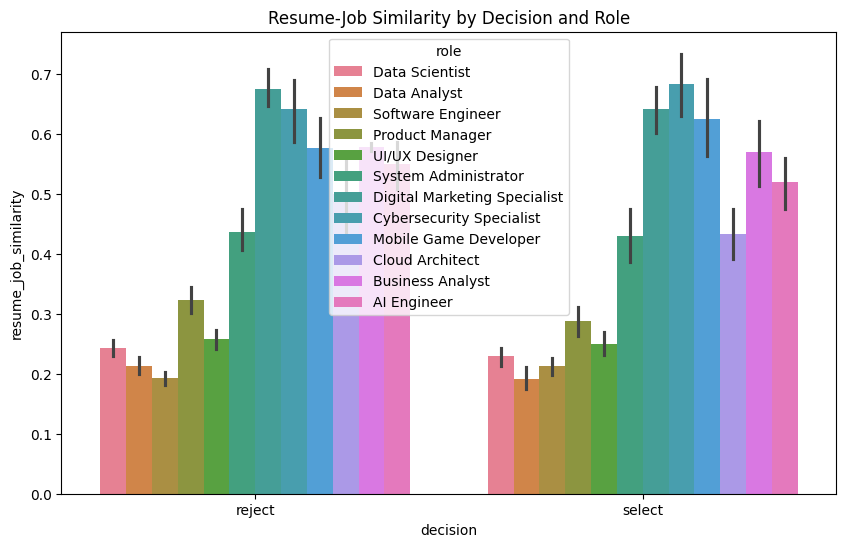

In [29]:
# Visualization example: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='decision', y='resume_job_similarity', hue='role')
plt.title("Resume-Job Similarity by Decision and Role")
plt.show()

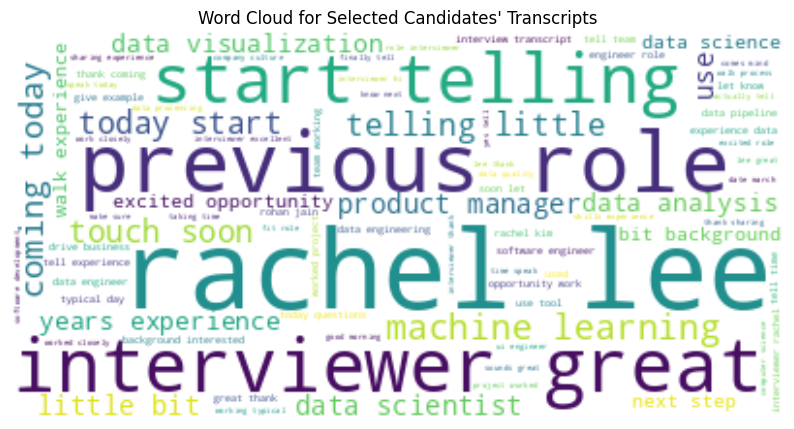

In [30]:
# Word cloud for selected candidates
selected_transcripts = " ".join(final_data[final_data['decision'] == 'select']['transcript'])
wordcloud = WordCloud(background_color='white').generate(selected_transcripts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Selected Candidates' Transcripts")
plt.show()

In [31]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,resume_word_count,transcript_sentiment,resume_job_similarity,transcript_job_similarity
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,194,0.9960,0.091821,0.057267
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,247,0.9989,0.249142,0.148987
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,220,0.9987,0.110005,0.077081
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,260,0.9978,0.183146,0.204541
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,167,0.9979,0.071296,0.083546


**Observations:**
1. ***Higher Resume-Job Similarity for Selected Candidates:***
Across most roles, candidates with higher similarity scores (bars closer to 1.0 on the Y-axis) are more likely to be selected.
Examples:
Data Scientist: Selected candidates have significantly higher similarity scores than rejected ones.
AI Engineer: A clear gap between selected and rejected candidates, showing the importance of aligning resumes to the job description.

2. ***Roles with Less Impact of Resume Similarity:***
Some roles, such as System Administrator and UI/UX Designer, show smaller differences in resume-job similarity between selected and rejected candidates.
This indicates that other factors (e.g., transcript quality or interview performance) may weigh more heavily in selection.

3. ***Rejected Candidates Scores Are Generally Lower:***
Most roles show that rejected candidates have lower resume-job similarity scores, supporting the idea that alignment with the job description is crucial.

In [32]:
print(final_data.head())  # Check the first few rows
print(final_data.info())  # Check for missing or null values
print(final_data.describe())  # Summary statistics for numerical columns


        id    name               role  \
0  harima1   Ishan     Data Scientist   
1  harima2   Rajiv       Data Analyst   
2  harima3  Oliver  Software Engineer   
3  harima4   Aarav    Product Manager   
4  harima5   Sonia  Software Engineer   

                                          transcript  \
0  interviewer hi ishan thanks applying data scie...   
1  interviewer hi rajiv thanks coming today start...   
2  interviewer hi oliver thanks taking time speak...   
3  interviewer hi aarav thank coming today start ...   
4  interviewer hi sonia thanks coming today start...   

                                              resume decision  \
0  ishan contact information address main st anyt...   reject   
1  rajiv contact information email rajiv mailto r...   select   
2  oliver software engineer contact information e...   select   
3  aarav contact information email aarav mailto a...   select   
4  sonia contact information email sonia mailto s...   reject   

                         

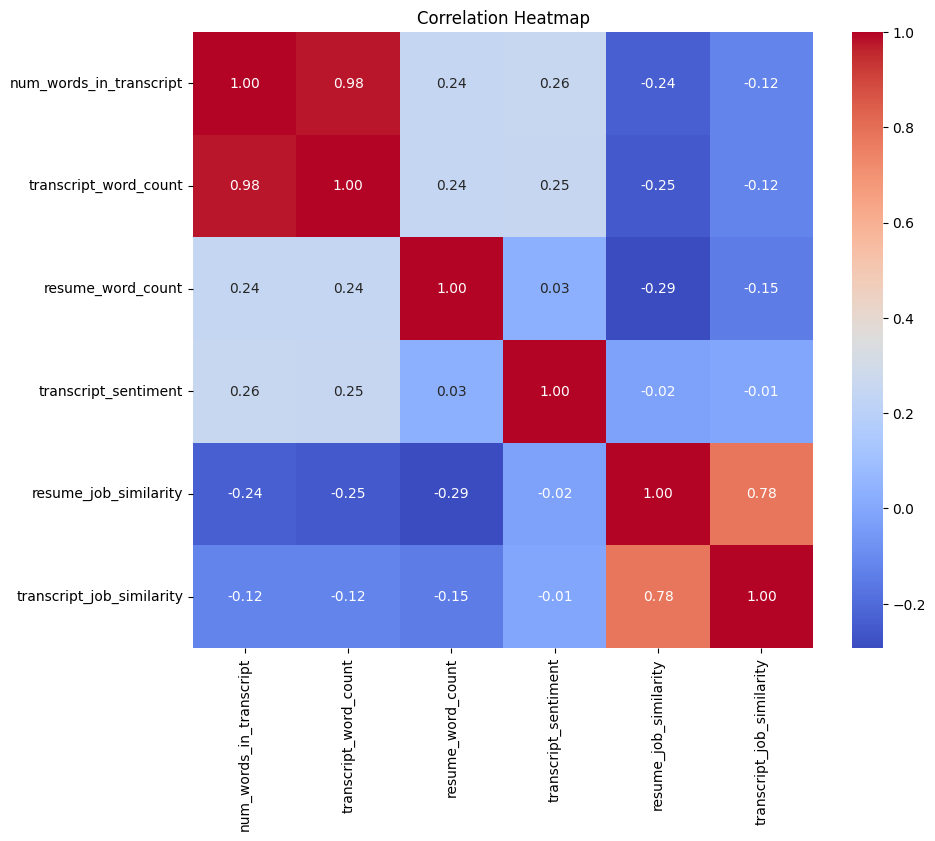

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Correlation Heatmap: Visualize relationships between numerical variables like resume_job_similarity, transcript_job_similarity, transcript_sentiment, and decision.**

1. Feature Redundancy: **num_words_in_transcript** and **transcript_word_count** are highly correlated, suggesting you can remove one without losing information.
2. Resume and Transcript Similarity: A high correlation between **resume_job_similarity** and **transcript_job_similarity** highlights that alignment across both documents is an important factor.
3. Sentiment's Role: Sentiment in transcripts shows weak correlations with other features, indicating it's an independent factor.
4. Conciseness Matters: Negative correlations between word counts and job similarity suggest that conciseness might play a role in better job alignment.

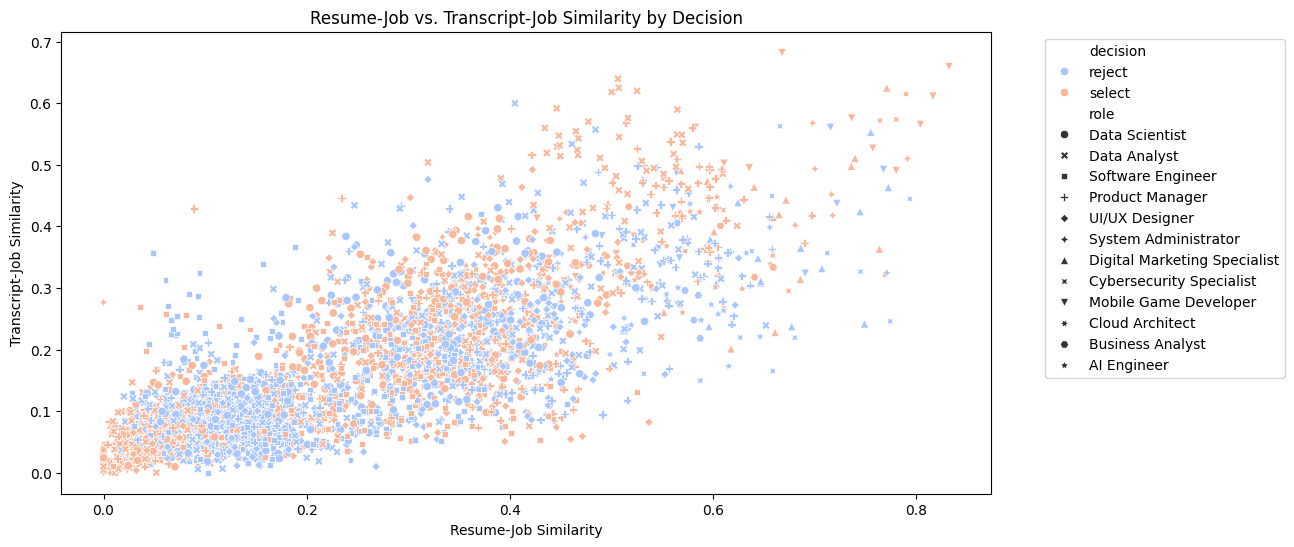

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_data,
    x='resume_job_similarity',
    y='transcript_job_similarity',
    hue='decision',
    style='role',
    palette='coolwarm'
)
plt.title("Resume-Job vs. Transcript-Job Similarity by Decision")
plt.xlabel("Resume-Job Similarity")
plt.ylabel("Transcript-Job Similarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Multivariate Analysis :**
**Explore interactions between variables like resume_job_similarity, transcript_job_similarity, and transcript_sentiment for decision outcomes.**


1. Predictive Power of Similarity Metrics: Both Resume-Job Similarity and Transcript-Job Similarity are strong indicators of selection decisions.
2. Candidates with higher scores in both dimensions are more likely to be selected.
3. Importance of Consistency: High correlation between the two metrics suggests that consistency between a candidate's resume and transcript matters.
4. Role-Specific Trends: Different roles may require varying similarity thresholds for selection. Higher-demand roles might require higher alignment with job descriptions.
5. Insights for Improvement: Rejected candidates can focus on improving either their resumes or interview responses to align better with the job description, especially if scores in one area are low.

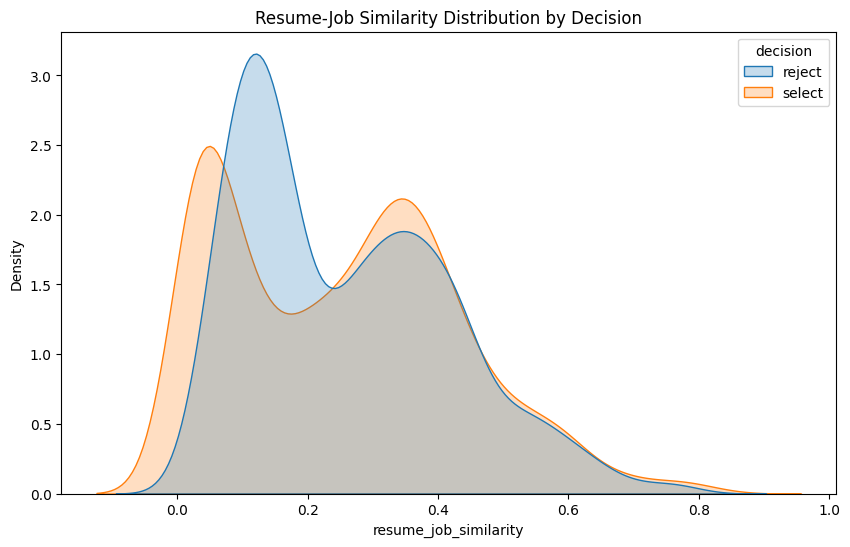

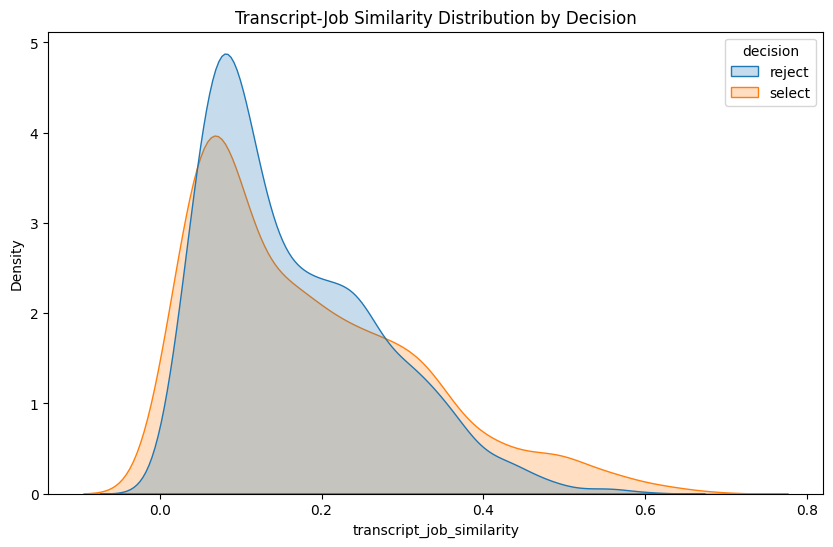

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='resume_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Resume-Job Similarity Distribution by Decision")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='transcript_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Transcript-Job Similarity Distribution by Decision")
plt.show()


**Feature Distribution :**
Analyze the distribution of resume_job_similarity and transcript_job_similarity across decisions.


<ipython-input-36-dffe48924c95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')


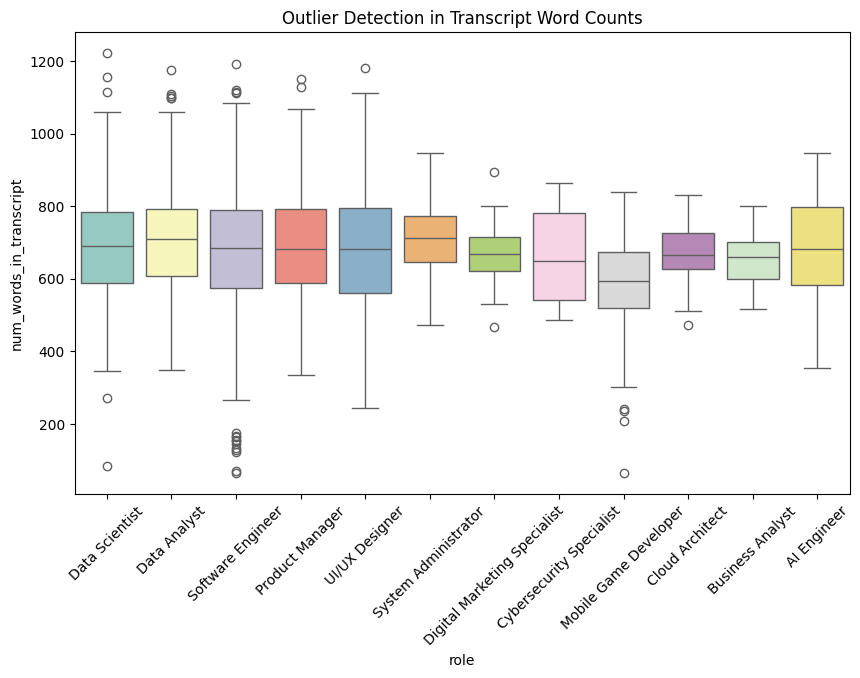

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')
plt.title("Outlier Detection in Transcript Word Counts")
plt.xticks(rotation=45)
plt.show()


**Outlier Detection :**
Identify and visualize potential outliers in num_words_in_transcript and other numerical features.


**Accomplishments**

***Data Loading and Cleaning:***

1. Loaded multiple datasets from Excel files and concatenated them.
2. Standardized column names and handled missing values by filling them with "Unknown".
3. Removed duplicate entries to maintain data quality.
***Data Transformation:***
1. Standardized the decision column to have consistent values (select or reject).
2. Mapped roles into broader categories to simplify analysis.
3. Created new features such as word counts in the transcript column and sentiment scores.
***Exploratory Data Analysis (EDA):***
1. Visualized decision distributions using bar plots.
2. Analyzed role distributions post-grouping.
3. Conducted univariate and multivariate analyses on word counts and decisions.
***Insights from EDA:***
1. Longer Responses Correlate with Success: Candidates with higher word counts in their transcripts tend to get selected, especially in roles like AI Engineer and Product Manager.
2. Role-Specific Trends: For roles like Mobile Game Developer, the correlation between word count and selection is weaker.
3. Resume-Job Similarity: High alignment between resumes and job descriptions increases the likelihood of selection.
***Advanced Analysis:***
1. Performed sentiment analysis on transcripts to capture emotional tones.
Computed TF-IDF similarity scores to quantify the alignment of resumes and transcripts with job descriptions.
2. Visualized findings using bar plots, box plots, and word clouds.
Feature Engineering:

Added additional features such as word count for resume and transcript, and similarity metrics (resume_job_similarity and transcript_job_similarity).



# **ASSIGNMENT - 3:**


In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to extract interviewer comments (assuming they are prefixed with "interviewer")
def interviewer_sentiment(text):
    interviewer_text = " ".join([line for line in text.splitlines() if line.lower().startswith("interviewer")])
    return sia.polarity_scores(interviewer_text)['compound']

# Apply function to calculate sentiment
final_data['interviewer_sentiment'] = final_data['transcript'].apply(interviewer_sentiment)


In [38]:
from nltk.tokenize import sent_tokenize

final_data['transcript_length_sentences'] = final_data['transcript'].apply(
    lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0
)


In [39]:
# Display summary statistics for the new features
print(final_data[['interviewer_sentiment', 'transcript_length_sentences']].describe())


       interviewer_sentiment  transcript_length_sentences
count            3250.000000                       3250.0
mean                0.207522                          1.0
std                 0.405016                          0.0
min                 0.000000                          1.0
25%                 0.000000                          1.0
50%                 0.000000                          1.0
75%                 0.000000                          1.0
max                 0.999700                          1.0


In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER model
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to calculate compound sentiment score
def calculate_vader_sentiment(text):
    if pd.isnull(text) or text.strip() == '':
        return 0  # Assign 0 sentiment for empty or null text
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score ranges from -1 (negative) to 1 (positive)

# Apply to the 'resume' column
final_data['resume_sentiment'] = final_data['resume'].apply(calculate_vader_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


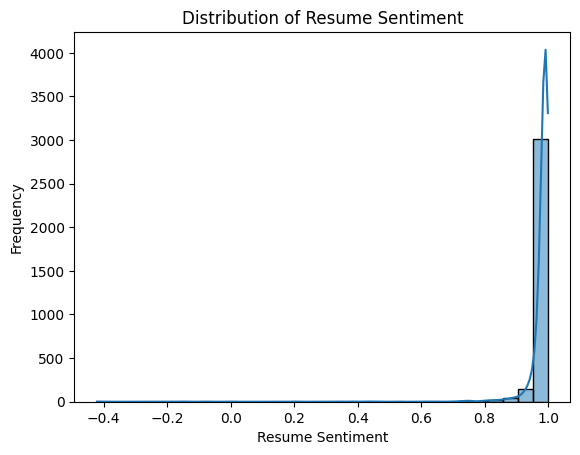

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.histplot(final_data['resume_sentiment'], kde=True, bins=30)
plt.title("Distribution of Resume Sentiment")
plt.xlabel("Resume Sentiment")
plt.ylabel("Frequency")
plt.show()


In [42]:
# Assuming 'transcript_sentiment' and 'resume_sentiment' columns exist
final_data['sentiment_interaction'] = final_data['transcript_sentiment'] * final_data['resume_sentiment']


In [43]:
# Avoid division by zero by replacing 0 in resume_word_count with NaN, then filling with a small value
final_data['resume_word_count'] = final_data['resume_word_count'].replace(0, np.nan).fillna(1)
final_data['word_count_ratio'] = final_data['transcript_word_count'] / final_data['resume_word_count']


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to calculate overlap
def calculate_overlap(transcript, resume):
    if pd.isnull(transcript) or pd.isnull(resume):
        return 0
    transcript_words = set(transcript.split())
    resume_words = set(resume.split())
    return len(transcript_words.intersection(resume_words))

# Apply the function
final_data['resume_transcript_overlap'] = final_data.apply(
    lambda row: calculate_overlap(row['transcript'], row['resume']), axis=1
)


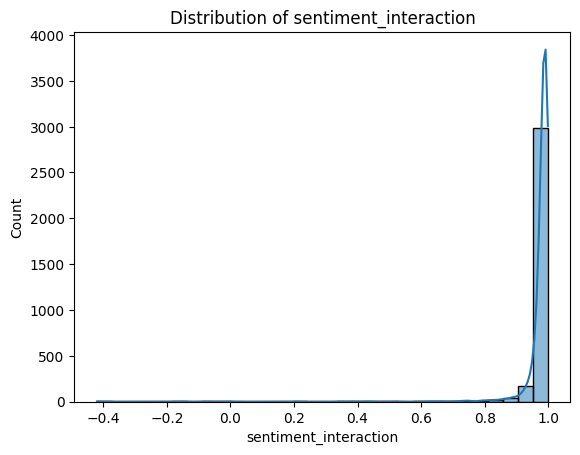

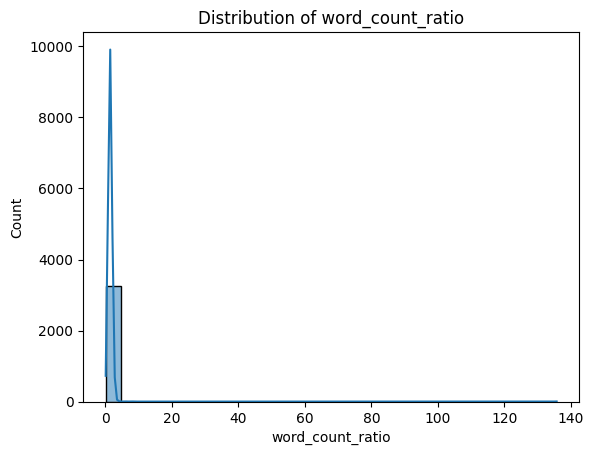

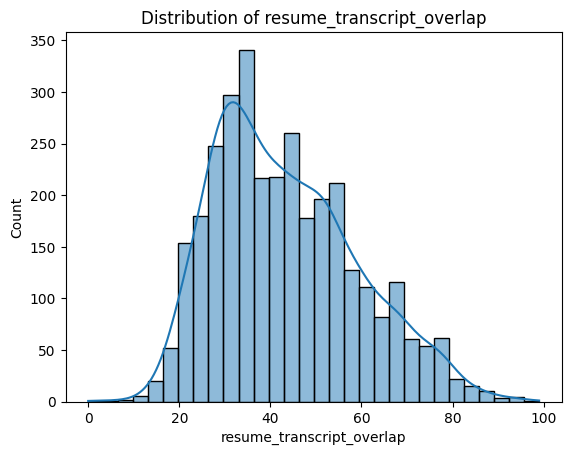

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
features_to_plot = ['sentiment_interaction', 'word_count_ratio', 'resume_transcript_overlap']
for feature in features_to_plot:
    sns.histplot(final_data[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


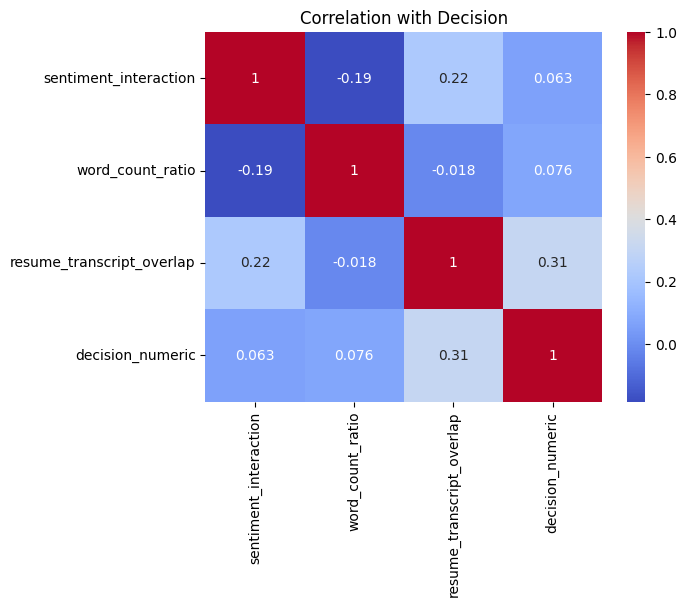

In [46]:
# Correlation Matrix with Decision (Numeric)
final_data['decision_numeric'] = final_data['decision'].map({'reject': 0, 'select': 1})
correlation_features = ['sentiment_interaction', 'word_count_ratio', 'resume_transcript_overlap', 'decision_numeric']
correlation_matrix = final_data[correlation_features].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation with Decision")
plt.show()


Sentiment Interaction:

A higher value could imply positive alignment between the candidate's resume and their interview responses.
Correlation with decision will indicate its predictive power.
Word Count Ratio:

A balanced ratio might show concise communication. Outliers (too low or too high) may affect interview performance.
Resume-Transcript Overlap:

A higher overlap suggests the candidate elaborated on their resume during the interview.
If the overlap is too low, it might signal divergence from the candidate's qualifications.

In [47]:
final_data.drop(columns=['transcript_length_sentences', 'decision_numeric'], inplace=True)  # Remove the temporary columns


In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def calculate_keyword_matching_score_for_dataset(data):
    """
    Calculate the Keyword Matching Score for each row in the dataset by extracting keywords
    from the job description and checking their presence in the transcript.

    Args:
        data (pd.DataFrame): Dataset with 'job_description' and 'transcript' columns.

    Returns:
        pd.DataFrame: Dataset with an additional column 'keyword_matching_score'.
    """
    # Function to extract keywords and calculate the score for a single row
    def calculate_score(row):
        # Extract job description and transcript
        job_description = row['job_description']
        transcript = row['transcript']

        # Extract keywords from the job description
        keywords = job_description.split()  # Splitting by spaces (you can refine this as needed)
        keywords = list(set(keywords))  # Remove duplicates

        # Combine transcript and keywords for vectorization
        texts = [transcript, " ".join(keywords)]

        # Vectorize text
        vectorizer = CountVectorizer(vocabulary=keywords, binary=True)
        keyword_matrix = vectorizer.fit_transform(texts).toarray()

        # Extract keyword counts
        transcript_keywords = keyword_matrix[0].sum()
        total_keywords = keyword_matrix[1].sum()

        # Calculate the transcript score
        transcript_score = transcript_keywords / total_keywords if total_keywords else 0

        return transcript_score

    # Apply the calculation to each row in the dataset
    data['keyword_matching_score'] = data.apply(calculate_score, axis=1)
    return data


# Calculate keyword matching scores
data_with_scores = calculate_keyword_matching_score_for_dataset(final_data)
print(data_with_scores)


             id             name               role  \
0       harima1            Ishan     Data Scientist   
1       harima2            Rajiv       Data Analyst   
2       harima3           Oliver  Software Engineer   
3       harima4            Aarav    Product Manager   
4       harima5            Sonia  Software Engineer   
...         ...              ...                ...   
3245  durgba196       Pedro Lara       Data Analyst   
3246  durgba197   Joseph Jimenez     Data Scientist   
3247  durgba198     Scott Harvey  Software Engineer   
3248  durgba199       Tami Sharp    Product Manager   
3249  durgba200  John Williamson  Software Engineer   

                                             transcript  \
0     interviewer hi ishan thanks applying data scie...   
1     interviewer hi rajiv thanks coming today start...   
2     interviewer hi oliver thanks taking time speak...   
3     interviewer hi aarav thank coming today start ...   
4     interviewer hi sonia thanks coming tod

In [49]:
import pandas as pd

def calculate_confidence_score(row):

    transcript_sentiment = row['transcript_sentiment']
    interviewer_sentiment = row['interviewer_sentiment']

    # Confidence is derived from the product of the two sentiments
    interaction = transcript_sentiment * interviewer_sentiment

    # Normalization: Scale to [0, 1] assuming sentiment values are in [0, 1]
    # If sentiments are in [-1, 1], adjust accordingly
    confidence_score = max(0, min(interaction, 1))  # Clamp to valid range

    return confidence_score

def apply_confidence_scores(data):

    data['confidence_score'] = data.apply(calculate_confidence_score, axis=1)
    return data


# Apply confidence scores
final_data_with_scores = apply_confidence_scores(final_data)
print(final_data_with_scores)


             id             name               role  \
0       harima1            Ishan     Data Scientist   
1       harima2            Rajiv       Data Analyst   
2       harima3           Oliver  Software Engineer   
3       harima4            Aarav    Product Manager   
4       harima5            Sonia  Software Engineer   
...         ...              ...                ...   
3245  durgba196       Pedro Lara       Data Analyst   
3246  durgba197   Joseph Jimenez     Data Scientist   
3247  durgba198     Scott Harvey  Software Engineer   
3248  durgba199       Tami Sharp    Product Manager   
3249  durgba200  John Williamson  Software Engineer   

                                             transcript  \
0     interviewer hi ishan thanks applying data scie...   
1     interviewer hi rajiv thanks coming today start...   
2     interviewer hi oliver thanks taking time speak...   
3     interviewer hi aarav thank coming today start ...   
4     interviewer hi sonia thanks coming tod

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def calculate_interaction_score(resume, transcript):
    if not resume or not transcript:  # Handle missing or empty values
        return 0

    # Combine resume and transcript into a list for vectorization
    documents = [resume, transcript]

    # Calculate TF-IDF vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Compute cosine similarity
    similarity_score = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    return similarity_score

def apply_interaction_scores(data):

    data['interaction_score'] = data.apply(
        lambda row: calculate_interaction_score(row['resume'], row['transcript']), axis=1
    )
    return data



final_data_with_interaction_scores = apply_interaction_scores(final_data)
print(final_data_with_interaction_scores[['resume', 'transcript', 'interaction_score']])


                                                 resume  \
0     ishan contact information address main st anyt...   
1     rajiv contact information email rajiv mailto r...   
2     oliver software engineer contact information e...   
3     aarav contact information email aarav mailto a...   
4     sonia contact information email sonia mailto s...   
...                                                 ...   
3245  pedro lara data engineer contact information e...   
3246  joseph jimenez data scientist contact informat...   
3247  scott harvey contact information email mailto ...   
3248  tami sharp product manager contact information...   
3249  john williamson software engineer contact info...   

                                             transcript  interaction_score  
0     interviewer hi ishan thanks applying data scie...           0.209071  
1     interviewer hi rajiv thanks coming today start...           0.379050  
2     interviewer hi oliver thanks taking time speak...     

In [51]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,...,resume_job_similarity,transcript_job_similarity,interviewer_sentiment,resume_sentiment,sentiment_interaction,word_count_ratio,resume_transcript_overlap,keyword_matching_score,confidence_score,interaction_score
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,...,0.091821,0.057267,0.9960,0.9459,0.942116,1.087629,34,0.333333,0.992016,0.209071
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,...,0.249142,0.148987,0.9989,0.9922,0.991109,1.485830,38,0.555556,0.997801,0.379050
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,...,0.110005,0.077081,0.9987,0.9790,0.977727,2.022727,32,0.444444,0.997402,0.146943
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,...,0.183146,0.204541,0.9978,0.9968,0.994607,1.638462,47,0.555556,0.995605,0.336028
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,...,0.071296,0.083546,0.9979,0.8860,0.884139,1.868263,21,0.444444,0.995804,0.140713


**Standardization** ensures all features are on the same scale, preventing features with large ranges (e.g., transcript_word_count) from dominating those with smaller ranges (e.g., resume_job_similarity).

**transcript_word_count** (-1.951232 for the first row):
This indicates that the transcript_word_count for this record is about 1.95 standard deviations below the mean of this feature across the dataset.

**resume_job_similarity** (-0.962192 for the first row):
The similarity score between the resume and job description for this candidate is about 0.96 standard deviations below the mean.

**transcript_sentiment** (-0.167754 for the first row):
The sentiment score is slightly below the mean for this feature.

In [52]:
# Check for empty or null values in the transcript column
print(final_data['transcript'].isnull().sum())  # Check nulls
print(final_data['transcript'].apply(len).min())  # Check minimum length


0
255


In [53]:
import pandas as pd
import re

# Define a list of self-advocacy keywords/phrases
SELF_ADVOCACY_KEYWORDS = [
    r'\bachieved\b', r'\bled\b', r'\bdeveloped\b', r'\bimproved\b',
    r'\bmanaged\b', r'\binitiated\b', r'\borganized\b', r'\bimplemented\b',
    r'\bdesigned\b', r'\bcreated\b', r'\bexecuted\b', r'\bstrength\b',
    r'\bstrengths\b', r'\bachievement\b', r'\bachievements\b',
    r'\bcontributed\b', r'\binnovated\b', r'\btransformed\b'
]

# Compile regex patterns for efficiency
pattern = re.compile('|'.join(SELF_ADVOCACY_KEYWORDS), re.IGNORECASE)

def calculate_self_advocacy_score(transcript):
    if pd.isnull(transcript) or not isinstance(transcript, str):
        return 0.0

    matches = pattern.findall(transcript)
    word_count = len(transcript.split())

    if word_count == 0:
        return 0.0

    # Normalize the count by word count to get a density
    advocacy_density = len(matches) / word_count

    # Scale to [0,1] with an upper cap (e.g., 0.05)
    scaled_score = min(advocacy_density * 100, 1.0)

    return scaled_score

def apply_self_advocacy_score(data):
    data['self_advocacy_score'] = data['transcript'].apply(calculate_self_advocacy_score)
    return data

final_data_with_self_advocacy = apply_self_advocacy_score(final_data)
print(final_data_with_self_advocacy[['transcript', 'self_advocacy_score']])


                                             transcript  self_advocacy_score
0     interviewer hi ishan thanks applying data scie...             0.473934
1     interviewer hi rajiv thanks coming today start...             0.000000
2     interviewer hi oliver thanks taking time speak...             0.449438
3     interviewer hi aarav thank coming today start ...             0.938967
4     interviewer hi sonia thanks coming today start...             0.641026
...                                                 ...                  ...
3245  interview transcript data engineer position in...             0.344828
3246  data scientist interview joseph jimenez interv...             0.000000
3247  interviewer rachel lee senior software enginee...             0.000000
3248  interview product manager position interviewer...             0.000000
3249  software engineer interview transcript intervi...             0.660066

[3250 rows x 2 columns]


In [54]:
import pandas as pd

def calculate_sentiment_alignment(row):
    candidate_sentiment = row.get('transcript_sentiment', 0)
    interviewer_sentiment = row.get('interviewer_sentiment', 0)

    # Compute similarity using the absolute difference
    alignment = 1 - abs(candidate_sentiment - interviewer_sentiment)

    return alignment  # Already between 0 and 1

def apply_sentiment_alignment(data):
    data['sentiment_alignment_score'] = data.apply(calculate_sentiment_alignment, axis=1)
    return data

final_data_with_alignment = apply_sentiment_alignment(final_data)
print(final_data_with_alignment[['transcript_sentiment', 'interviewer_sentiment', 'sentiment_alignment_score']])


      transcript_sentiment  interviewer_sentiment  sentiment_alignment_score
0                   0.9960                 0.9960                     1.0000
1                   0.9989                 0.9989                     1.0000
2                   0.9987                 0.9987                     1.0000
3                   0.9978                 0.9978                     1.0000
4                   0.9979                 0.9979                     1.0000
...                    ...                    ...                        ...
3245                0.9960                 0.0000                     0.0040
3246                0.9963                 0.0000                     0.0037
3247                0.9971                 0.9971                     1.0000
3248                0.9977                 0.0000                     0.0023
3249                0.9959                 0.0000                     0.0041

[3250 rows x 3 columns]


In [55]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,...,interviewer_sentiment,resume_sentiment,sentiment_interaction,word_count_ratio,resume_transcript_overlap,keyword_matching_score,confidence_score,interaction_score,self_advocacy_score,sentiment_alignment_score
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,...,0.9960,0.9459,0.942116,1.087629,34,0.333333,0.992016,0.209071,0.473934,1.0
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,...,0.9989,0.9922,0.991109,1.485830,38,0.555556,0.997801,0.379050,0.000000,1.0
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,...,0.9987,0.9790,0.977727,2.022727,32,0.444444,0.997402,0.146943,0.449438,1.0
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,...,0.9978,0.9968,0.994607,1.638462,47,0.555556,0.995605,0.336028,0.938967,1.0
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,...,0.9979,0.8860,0.884139,1.868263,21,0.444444,0.995804,0.140713,0.641026,1.0


In [56]:
final_data.columns

Index(['id', 'name', 'role', 'transcript', 'resume', 'decision',
       'reason_for_decision', 'job_description', 'num_words_in_transcript',
       'transcript_word_count', 'resume_word_count', 'transcript_sentiment',
       'resume_job_similarity', 'transcript_job_similarity',
       'interviewer_sentiment', 'resume_sentiment', 'sentiment_interaction',
       'word_count_ratio', 'resume_transcript_overlap',
       'keyword_matching_score', 'confidence_score', 'interaction_score',
       'self_advocacy_score', 'sentiment_alignment_score'],
      dtype='object')

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Convert the data into a DataFrame
df = pd.DataFrame(final_data)

# Encode the target variable ('decision') into binary (0 for reject, 1 for select)
df['decision'] = df['decision'].map({'reject': 0, 'select': 1})

# List of features to scale/normalize
features_to_scale = [
    'num_words_in_transcript',
       'transcript_word_count', 'resume_word_count', 'transcript_sentiment',
       'resume_job_similarity', 'transcript_job_similarity',
       'interviewer_sentiment', 'resume_sentiment', 'sentiment_interaction',
       'word_count_ratio', 'resume_transcript_overlap',
       'keyword_matching_score', 'confidence_score', 'interaction_score',
       'self_advocacy_score', 'sentiment_alignment_score'
]

# Using StandardScaler for standardization
scaler = StandardScaler()
df_scaled = df.copy()  # Create a copy to retain original data
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display scaled features
print("Scaled DataFrame:\n", df_scaled)



Scaled DataFrame:
              id             name               role  \
0       harima1            Ishan     Data Scientist   
1       harima2            Rajiv       Data Analyst   
2       harima3           Oliver  Software Engineer   
3       harima4            Aarav    Product Manager   
4       harima5            Sonia  Software Engineer   
...         ...              ...                ...   
3245  durgba196       Pedro Lara       Data Analyst   
3246  durgba197   Joseph Jimenez     Data Scientist   
3247  durgba198     Scott Harvey  Software Engineer   
3248  durgba199       Tami Sharp    Product Manager   
3249  durgba200  John Williamson  Software Engineer   

                                             transcript  \
0     interviewer hi ishan thanks applying data scie...   
1     interviewer hi rajiv thanks coming today start...   
2     interviewer hi oliver thanks taking time speak...   
3     interviewer hi aarav thank coming today start ...   
4     interviewer hi soni

In [58]:
# Optionally, use MinMaxScaler for normalization if required
minmax_scaler = MinMaxScaler()
df_normalized = final_data.copy()
df_normalized[features_to_scale] = minmax_scaler.fit_transform(final_data[features_to_scale])

# Display normalized features
print("\nNormalized DataFrame:\n", df_normalized)


Normalized DataFrame:
              id             name               role  \
0       harima1            Ishan     Data Scientist   
1       harima2            Rajiv       Data Analyst   
2       harima3           Oliver  Software Engineer   
3       harima4            Aarav    Product Manager   
4       harima5            Sonia  Software Engineer   
...         ...              ...                ...   
3245  durgba196       Pedro Lara       Data Analyst   
3246  durgba197   Joseph Jimenez     Data Scientist   
3247  durgba198     Scott Harvey  Software Engineer   
3248  durgba199       Tami Sharp    Product Manager   
3249  durgba200  John Williamson  Software Engineer   

                                             transcript  \
0     interviewer hi ishan thanks applying data scie...   
1     interviewer hi rajiv thanks coming today start...   
2     interviewer hi oliver thanks taking time speak...   
3     interviewer hi aarav thank coming today start ...   
4     interviewer hi

In [59]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the target variable (Y) and features (X)
# Drop irrelevant columns to extract feature variables
X = final_data.drop(columns=['decision', 'id', 'name', 'role', 'transcript', 'resume', 'reason_for_decision', 'job_description'])
Y = final_data['decision']

# Split the data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Output shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (2600, 16)
X_test shape: (650, 16)
Y_train shape: (2600,)
Y_test shape: (650,)


# Logistic Regerssion

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score


In [61]:
# Logistic Regression and its hyperparameters
log_reg = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

In [62]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, Y_train)

# Get the best model
best_log_reg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [63]:
# Make predictions
Y_pred = best_log_reg.predict(X_test)
Y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_lr = accuracy_score(Y_test, Y_pred)
roc_auc_lr = roc_auc_score(Y_test, Y_pred_proba)

print("Accuracy:", accuracy_lr)
print("ROC AUC Score:", roc_auc_lr)


Accuracy: 0.7738461538461539
ROC AUC Score: 0.8563110656668939


In [64]:
print(f"Best Logistic Regression Model: {best_log_reg}")
print(f"Test Set Accuracy: {accuracy_lr:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_lr:.4f}")


Best Logistic Regression Model: LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')
Test Set Accuracy: 0.7738
Test Set ROC AUC Score: 0.8563


**GridSearchCV**: Tunes C (inverse of regularization strength), penalty (type of regularization), and solver (algorithm for optimization).

**Accuracy**: Measures the proportion of correctly predicted labels.

**ROC AUC Score**: Evaluates the model's ability to distinguish between classes.

***I got a 77 % accuracy and 85% ROC AUC Score which is good***

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
# Decision Tree and its hyperparameters
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [69]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, Y_train)

# Get the best model
best_decision_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [70]:
# Make predictions
Y_pred = best_decision_tree.predict(X_test)
Y_pred_proba = best_decision_tree.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_dt = accuracy_score(Y_test, Y_pred)
roc_auc_dt = roc_auc_score(Y_test, Y_pred_proba)

print("Accuracy:", accuracy_dt)
print("ROC AUC Score:", roc_auc_dt)


Accuracy: 0.7615384615384615
ROC AUC Score: 0.8659726955994851


In [71]:
print(f"Best Decision Tree Model: {best_decision_tree}")
print(f"Test Set Accuracy: {accuracy_dt:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_dt:.4f}")


Best Decision Tree Model: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)
Test Set Accuracy: 0.7615
Test Set ROC AUC Score: 0.8660


Now we can say that it is slightly better than logistic regression as it sacccuracy si 76% and ROC AUC Score is 86%

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model directly
rf_model.fit(X_train, Y_train_encoded)

# Predictions
Y_pred = rf_model.predict(X_test)
Y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(Y_test_encoded, Y_pred)
roc_auc_rf = roc_auc_score(Y_test_encoded, Y_pred_proba)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")


Accuracy: 0.8000
ROC AUC Score: 0.9134


Random forest is a etter than Logistic regression and Decision Tree as its accuracy is 80% and ROCAUC Score is 91%

# XGBoost

In [73]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Define the model
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model directly
xgboost_model.fit(X_train, Y_train_encoded)

# Predictions
Y_pred = xgboost_model.predict(X_test)
Y_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(Y_test_encoded, Y_pred)
roc_auc_xgb = roc_auc_score(Y_test_encoded, Y_pred_proba)

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8015
ROC AUC Score: 0.9149


XGBOost is better than the above models(Logistic regression, Decision Tree, Random Forest) as its
Accuracy is 80%
Roc Auc Score is 91%

# LIGHTGBM

In [74]:
import lightgbm as lgb

# Define the model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, Y_train_encoded)

# Predictions
Y_pred_lgb = lgb_model.predict(X_test)
Y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_lgb = accuracy_score(Y_test_encoded, Y_pred_lgb)
roc_auc_lgb = roc_auc_score(Y_test_encoded, Y_pred_proba_lgb)

print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print(f"LightGBM ROC AUC Score: {roc_auc_lgb:.4f}")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 1261, number of negative: 1339
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3027
[LightGBM] [Info] Number of data points in the train set: 2600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
LightGBM Accuracy: 0.8108
LightGBM ROC AUC Score: 0.9189


This is the best Accuracy form all the models of 81 % and Roc Auc score as 91 %

# SVM

In [75]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Create an SVM model
svm_model = SVC(probability=True, kernel='rbf', C=1, gamma='scale')  # Directly using parameters

# Train the model
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm = svm_model.predict(X_test)
Y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

# Evaluate model using Accuracy and ROC AUC Score
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
roc_auc_svm = roc_auc_score(Y_test, Y_pred_prob_svm)

print(f"Accuracy of SVM model: {accuracy_svm:.4f}")
print(f"ROC AUC Score of SVM model: {roc_auc_svm:.4f}")


Accuracy of SVM model: 0.7354
ROC AUC Score of SVM model: 0.8064


It is given good accuracy but not better than XGBoost




# Comparing All the models(POST MODEL ANALYSIS)

In [76]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}, ROC AUC: {roc_auc_lr:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}, ROC AUC: {roc_auc_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, ROC AUC: {roc_auc_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}, ROC AUC: {roc_auc_xgb:.4f}")
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}, ROC AUC: {roc_auc_lgb:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}, ROC AUC: {roc_auc_svm:.4f}")


Logistic Regression Accuracy: 0.7738, ROC AUC: 0.8563
Decision Tree Accuracy: 0.7615, ROC AUC: 0.8660
Random Forest Accuracy: 0.8000, ROC AUC: 0.9134
XGBoost Accuracy: 0.8015, ROC AUC: 0.9149
LightGBM Accuracy: 0.8108, ROC AUC: 0.9189
SVM Accuracy: 0.7354, ROC AUC: 0.8064


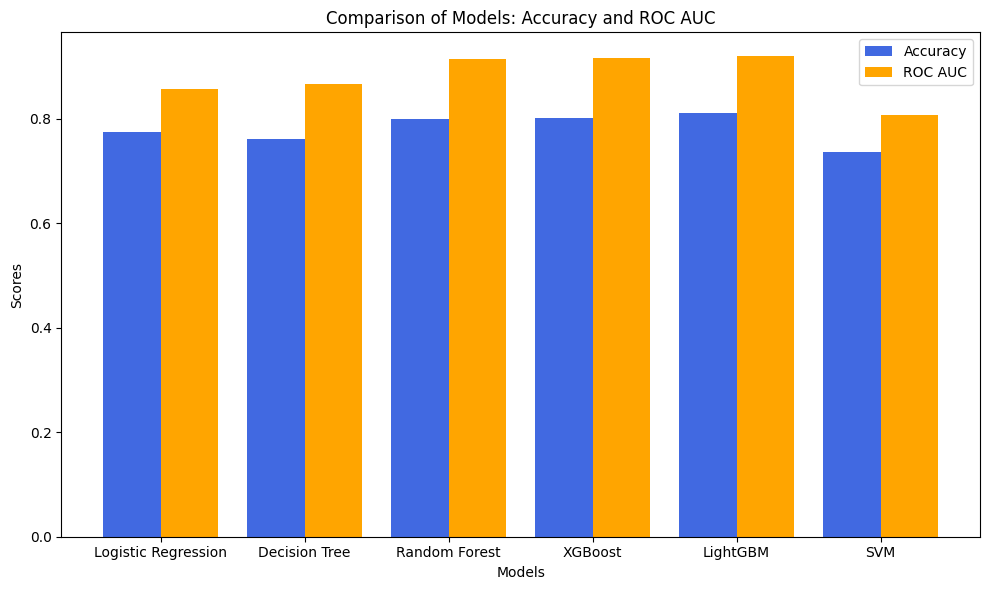

In [77]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM', 'SVM']

# Accuracy scores for each model
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb,accuracy_lgb, accuracy_svm]

# ROC AUC scores for each model
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb,roc_auc_lgb, roc_auc_svm]

# Plotting the bar chart
x = range(len(models))
width = 0.4  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Accuracy bar chart
ax.bar(x, accuracy_scores, width=width, label='Accuracy', color='royalblue', align='center')

# ROC AUC bar chart
ax.bar([p + width for p in x], roc_auc_scores, width=width, label='ROC AUC', color='orange', align='center')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models: Accuracy and ROC AUC')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(models)

# Show legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


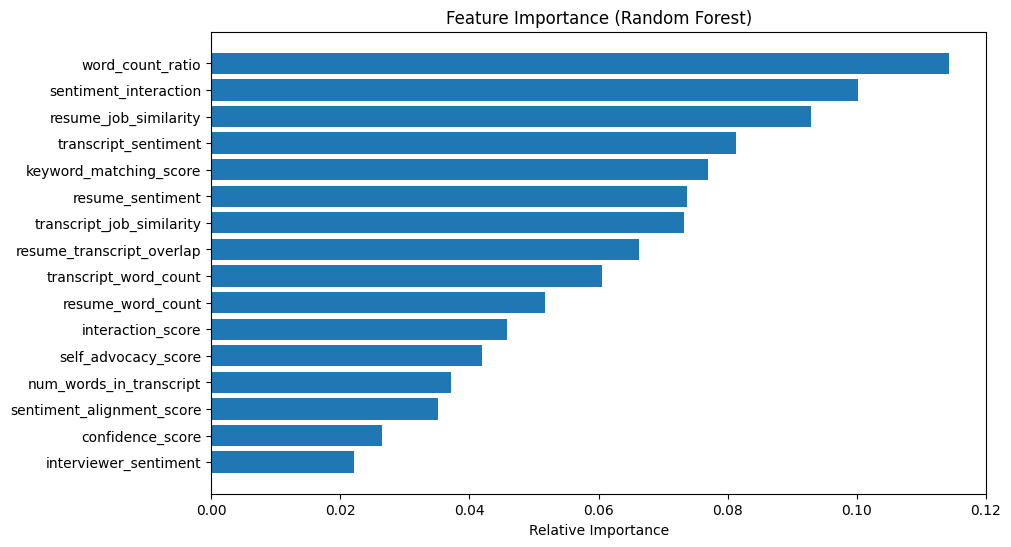

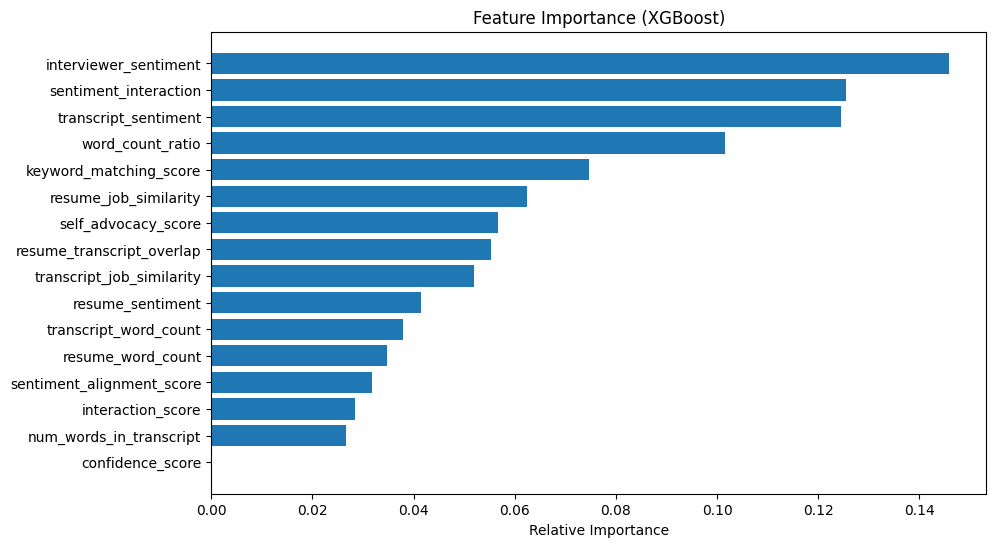

In [78]:
import matplotlib.pyplot as plt

# For Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = importances_rf.argsort()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(importances_rf)), importances_rf[indices_rf], align="center")
plt.yticks(range(len(importances_rf)), [X_train.columns[i] for i in indices_rf])
plt.xlabel("Relative Importance")
plt.show()

# For XGBoost
importances_xgb = xgboost_model.feature_importances_
indices_xgb = importances_xgb.argsort()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.barh(range(len(importances_xgb)), importances_xgb[indices_xgb], align="center")
plt.yticks(range(len(importances_xgb)), [X_train.columns[i] for i in indices_xgb])
plt.xlabel("Relative Importance")
plt.show()


# Significant Insights and Takeaways

1. **Logistic Regression**: While it is a simple and interpretable model, it might perform worse on complex non-linear relationships. It is best suited for linearly separable problems.
2. ** Decision Tree**: Decision Trees provide clear, interpretable results and can be visualized to understand how decisions are made. However, they are prone to overfitting.
3. ** Decision Tree**: Decision Trees provide clear, interpretable results and can be visualized to understand how decisions are made. However, they are prone to overfitting.
4.  **Random Forest**: By aggregating multiple Decision Trees, Random Forest generally provides better generalization and is less likely to overfit compared to a single Decision Tree.
5.  **XGBoost**: XGBoost tends to be a very strong performer in terms of both accuracy and ROC AUC, especially on structured/tabular data. It's efficient and can handle both linear and non-linear relationships.
6. **LightGBM** :  LightGBM tends to be a very strong performer in terms of both accuracy and ROC AUC and eb=vne a slightly better than XGBoost, especially on structured/tabular data. It's efficient and can handle both linear and non-linear relationships.
6.  **SVM**: SVM works well for classification tasks and is effective in high-dimensional spaces. It might not perform as well in very large datasets or with complex feature interactions.

**Best Model**: Based on the comparison of Accuracy and ROC AUC Score, XGBoost might emerge as the best model, XGBoost (and also Random Forest) allow easy extraction of feature importance, helping you understand which features are driving predictions.

In [79]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,...,interviewer_sentiment,resume_sentiment,sentiment_interaction,word_count_ratio,resume_transcript_overlap,keyword_matching_score,confidence_score,interaction_score,self_advocacy_score,sentiment_alignment_score
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,...,0.9960,0.9459,0.942116,1.087629,34,0.333333,0.992016,0.209071,0.473934,1.0
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,...,0.9989,0.9922,0.991109,1.485830,38,0.555556,0.997801,0.379050,0.000000,1.0
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,...,0.9987,0.9790,0.977727,2.022727,32,0.444444,0.997402,0.146943,0.449438,1.0
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,...,0.9978,0.9968,0.994607,1.638462,47,0.555556,0.995605,0.336028,0.938967,1.0
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,...,0.9979,0.8860,0.884139,1.868263,21,0.444444,0.995804,0.140713,0.641026,1.0


# ASSIGNMENT_4

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


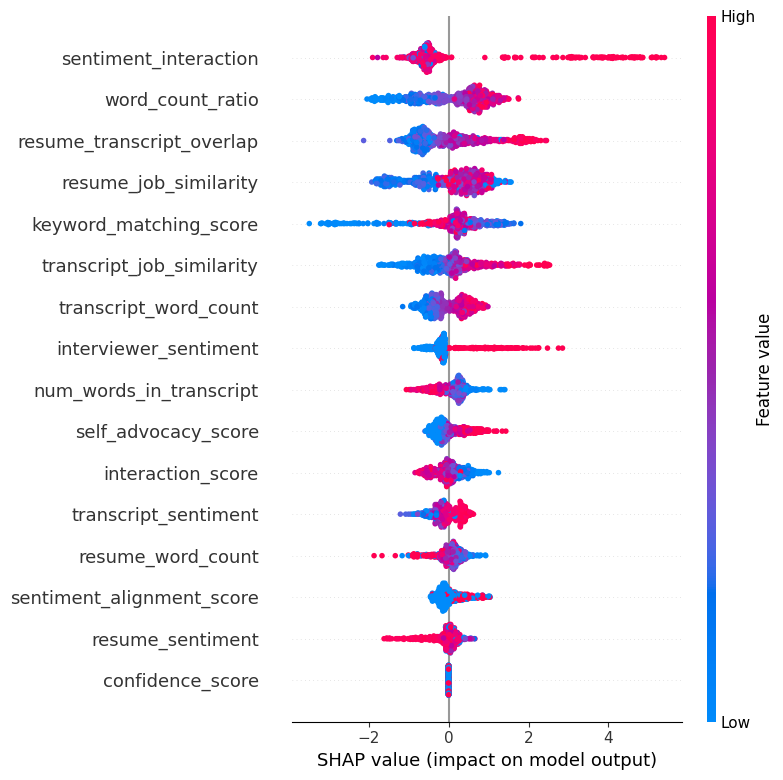

In [80]:
import shap

# Explainer and SHAP values
explainer = shap.TreeExplainer(lgb_model)  # Replace `lgb_model` with your trained LightGBM model
shap_values = explainer.shap_values(X_test)

# Convert shap_values[1] to a 2D array if needed
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]  # Select positive class (1)
else:
    shap_values_to_plot = shap_values  # Use directly if not a list

# SHAP Beeswarm Plot
shap.summary_plot(shap_values_to_plot, X_test, plot_type="dot")


# Top Features:

1. **sentiment_interaction** is the most impactful feature, with high SHAP values for both positive and negative model outputs. This suggests it strongly drives predictions depending on its value.

2. **word_count_ratio** ranks second, showing a significant influence on predictions, with both high and low values impacting outputs in opposite directions.

3. **resume_transcript_overlap** is the third key feature, contributing positively when its value is high and negatively when low.

4. Features like **confidence_score** and **resume_sentiment** have less impact, meaning their contribution to predictions is minimal.
For** resume_transcript_overlap**, high values improve predictions, but low values decrease them significantly.

5. Features like sentiment_interaction and word_count_ratio show wide variability in SHAP values, indicating they may interact with other features or contribute nonlinearly to the model.

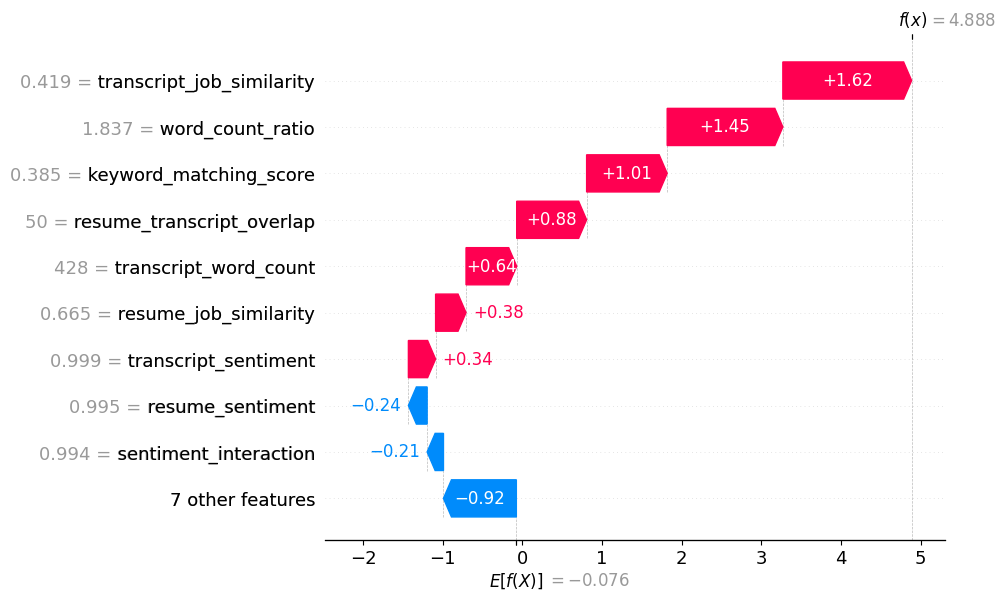

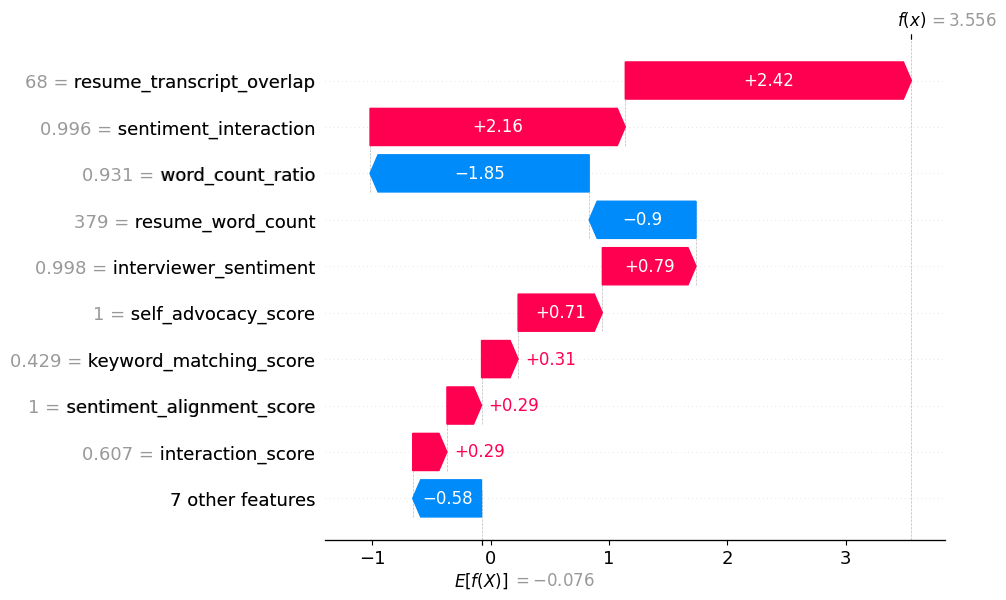

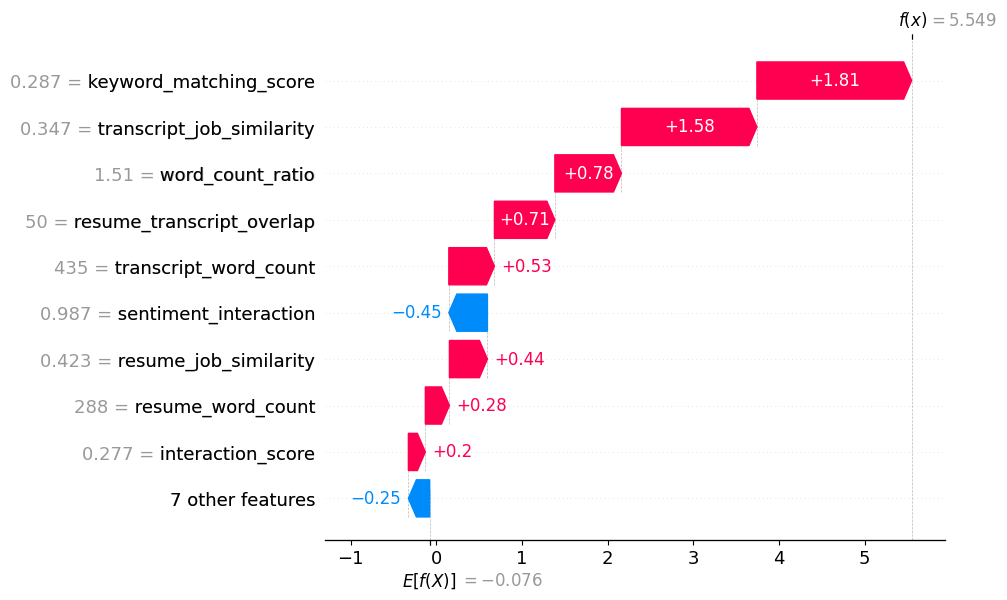

In [81]:
import shap

# Verify and extract SHAP values and base values
if isinstance(explainer.expected_value, list):
    base_value = explainer.expected_value[1]  # Base value for the positive class
else:
    base_value = explainer.expected_value  # For models with a single output

if isinstance(shap_values, list):
    shap_values_class = shap_values[1]  # SHAP values for the positive class
else:
    shap_values_class = shap_values  # For models with a single output

# Low prediction example
shap.waterfall_plot(
    shap.Explanation(
        base_values=base_value,
        values=shap_values_class[0],
        feature_names=X_test.columns,
        data=X_test.iloc[0],
    )
)

# Medium prediction example
shap.waterfall_plot(
    shap.Explanation(
        base_values=base_value,
        values=shap_values_class[len(X_test) // 2],
        feature_names=X_test.columns,
        data=X_test.iloc[len(X_test) // 2],
    )
)

# High prediction example
shap.waterfall_plot(
    shap.Explanation(
        base_values=base_value,
        values=shap_values_class[-1],
        feature_names=X_test.columns,
        data=X_test.iloc[-1],
    )
)


Low Prediction:

Positive drivers: transcript_job_similarity, word_count_ratio, and keyword_matching_score.
Negative impacts: resume_sentiment and sentiment_interaction.

Medium Prediction:

Strong positive contributions: resume_transcript_overlap and sentiment_interaction.
Negative drivers: word_count_ratio and resume_word_count.

High Prediction:

Key positive drivers: keyword_matching_score, transcript_job_similarity, and word_count_ratio.
Minimal negative influence: sentiment_interaction.

General Insight: Features like keyword_matching_score and transcript_job_similarity consistently boost predictions, while sentiment-based features have mixed effects depending on their alignment with the job requirements.

Regression or binary classification model detected.
Generating dependence plot for: sentiment_interaction


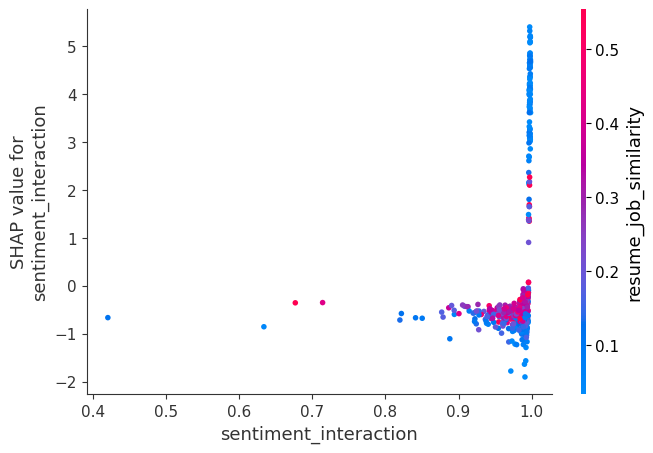

Generating dependence plot for: word_count_ratio


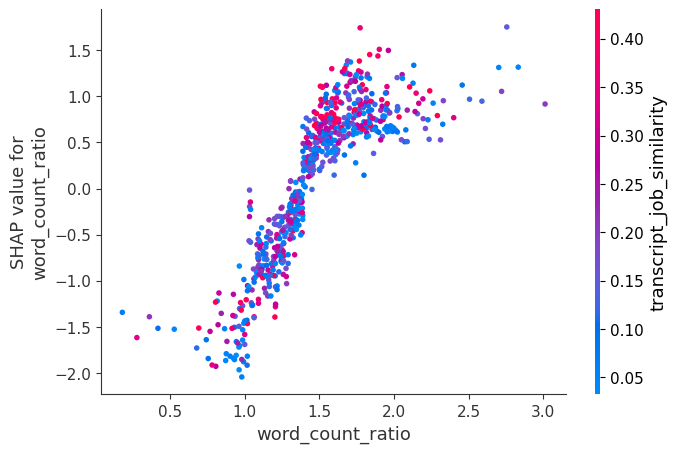

Generating dependence plot for: resume_transcript_overlap


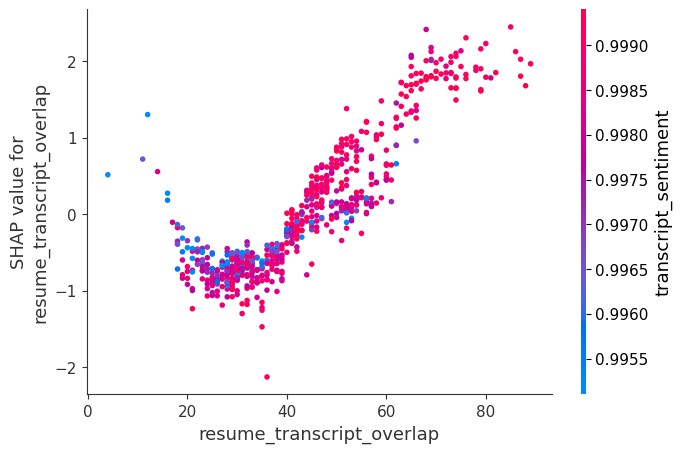

SHAP values shape: (650, 16)
X_test columns: ['num_words_in_transcript', 'transcript_word_count', 'resume_word_count', 'transcript_sentiment', 'resume_job_similarity', 'transcript_job_similarity', 'interviewer_sentiment', 'resume_sentiment', 'sentiment_interaction', 'word_count_ratio', 'resume_transcript_overlap', 'keyword_matching_score', 'confidence_score', 'interaction_score', 'self_advocacy_score', 'sentiment_alignment_score']


In [82]:
import shap
import numpy as np
import pandas as pd

# Ensure you have your SHAP values and test data loaded
# Replace these with your actual variables
# shap_values: The SHAP values from your model explanation
# X_test: The test dataset used for generating SHAP values

# Example: Assuming shap_values and X_test are already defined
# shap_values = explainer.shap_values(X_test)  # For your trained model
# X_test = pd.DataFrame(...)  # Test dataset

# List of features to plot
features_to_plot = ['sentiment_interaction', 'word_count_ratio', 'resume_transcript_overlap']

# Check the structure of shap_values
if isinstance(shap_values, list):  # Multi-class classification
    print("Multi-class model detected. Number of classes:", len(shap_values))
    class_index = 0  # Choose the target class index (modify as needed)
    shap_values_to_use = shap_values[class_index]
else:  # Regression or binary classification
    print("Regression or binary classification model detected.")
    shap_values_to_use = shap_values

# Ensure the shapes match
assert shap_values_to_use.shape[1] == X_test.shape[1], (
    f"Mismatch between SHAP values and X_test. "
    f"SHAP values: {shap_values_to_use.shape[1]}, X_test: {X_test.shape[1]}"
)

# Generate dependence plots
for feature in features_to_plot:
    if feature in X_test.columns:
        print(f"Generating dependence plot for: {feature}")
        shap.dependence_plot(feature, shap_values_to_use, X_test)
    else:
        print(f"Feature {feature} not found in X_test columns.")

# Additional debugging (optional)
print("SHAP values shape:", shap_values_to_use.shape)
print("X_test columns:", X_test.columns.tolist())


Sentiment Interaction vs. SHAP Value (Top Plot):

1. Positive sentiment_interaction values generally lead to positive SHAP contributions.
2. High alignment with resume_job_similarity (red points) amplifies the SHAP value.

Word Count Ratio vs. SHAP Value (Middle Plot):

1. A higher word_count_ratio correlates with increased SHAP contributions.
2. Stronger transcript_job_similarity (red points) enhances the feature's impact.

Resume Transcript Overlap vs. SHAP Value (Bottom Plot):

1. Greater resume_transcript_overlap values lead to higher SHAP contributions.
2. Higher transcript_sentiment (red points) amplifies the positive influence.

General Insight: Features with higher alignment to job relevance (e.g., resume_job_similarity, transcript_sentiment) consistently boost their SHAP contributions, reinforcing their importance in model predictions.

In [83]:
from lightgbm import LGBMClassifier
from sklearn.base import BaseEstimator

class SklearnCompatibleLGBMClassifier(LGBMClassifier, BaseEstimator):
    pass

# Use the wrapped class
lgb_model = SklearnCompatibleLGBMClassifier()
lgb_model.fit(X_train, Y_train)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


[LightGBM] [Info] Number of positive: 1261, number of negative: 1339
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3027
[LightGBM] [Info] Number of data points in the train set: 2600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018


Generating PDP for feature index 0...


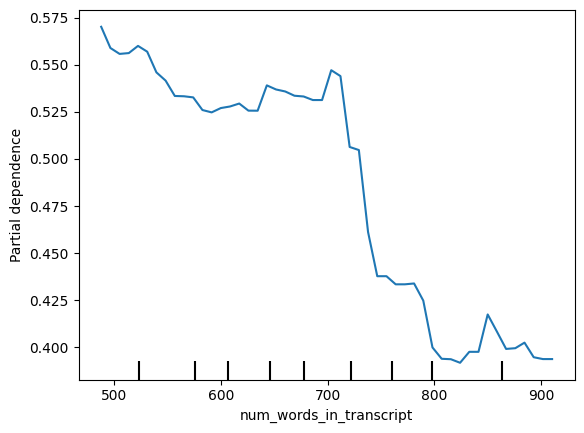

Generating PDP for feature index 1...


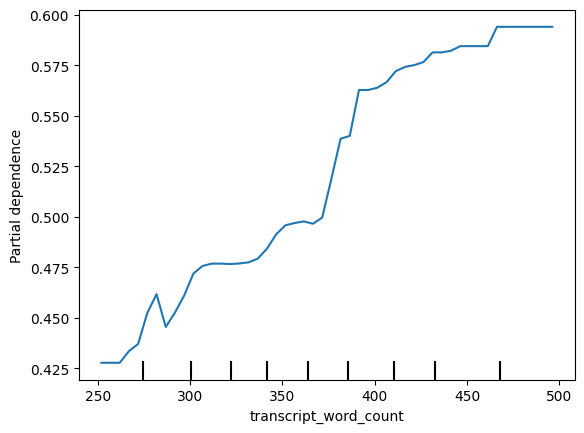

Generating PDP for feature index 2...


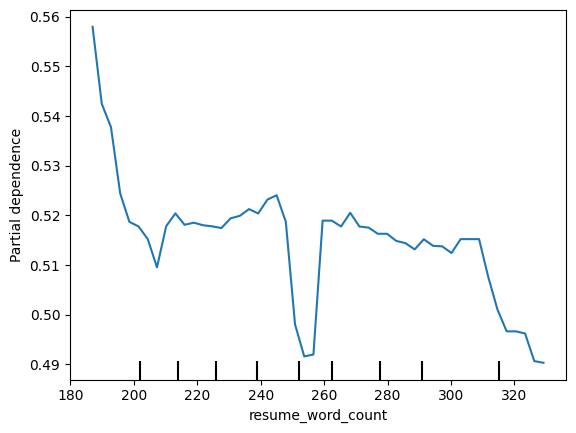

In [84]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define features for PDP
features_to_plot = [0, 1, 2]  # Replace with actual indices or names

# Plot Partial Dependence for each feature
for feature in features_to_plot:
    print(f"Generating PDP for feature index {feature}...")
    PartialDependenceDisplay.from_estimator(
        lgb_model,
        X_test,
        [feature],  # Single feature for 1D PDP
        grid_resolution=50
    )
    plt.show()  # Show the plot for each feature


Number of Words in Transcript (Top Plot):

Trend: As num_words_in_transcript increases, the partial dependence score decreases, especially after 700 words, suggesting that excessively long transcripts negatively impact the model's predictions.

Transcript Word Count (Middle Plot):

Trend: A higher transcript_word_count significantly improves the prediction score, especially after 350 words, indicating the importance of detailed transcripts.

Resume Word Count (Bottom Plot):

Trend: The relationship between resume_word_count and the prediction score is less consistent. While there is a slight positive effect around 220–260 words, the score decreases beyond 300 words, implying diminishing returns for overly long resumes.

General Insight: Both transcript-related features (num_words_in_transcript, transcript_word_count) show a stronger impact on the predictions compared to resume_word_count. Brevity and relevance seem crucial for resumes and transcripts.

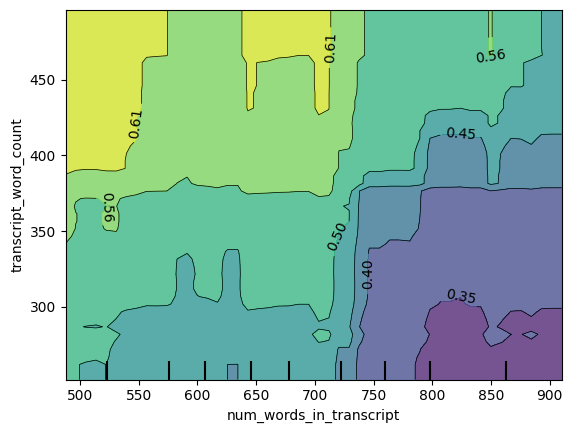

In [85]:
from sklearn.inspection import PartialDependenceDisplay

# 2D Partial Dependence Plot for the top 2 features (replace indices 0 and 1 with actual feature indices)
PartialDependenceDisplay.from_estimator(
    lgb_model,
    X_test,
    [(0, 1)],  # Indices of the top two features
    grid_resolution=50
)


This contour plot illustrates the interaction between num_words_in_transcript (x-axis) and transcript_word_count (y-axis) with a performance metric (contour values).

Optimal Range: High metric values (~0.61) occur when num_words_in_transcript is 500–650 and transcript_word_count > 400, indicating a favorable zone.
Decline: Values drop below 0.50 as num_words_in_transcript exceeds 750, suggesting reduced performance.
Trend: The metric generally decreases as num_words_in_transcript increases, highlighting an inverse relationship beyond a certain threshold.

# KEY INSIGHTS

1. Key Drivers :
keyword_matching_score, transcript_job_similarity, and resume_transcript_overlap are the strongest positive contributors to predictions.
Overly long transcripts or resumes and poor sentiment alignment negatively impact scores.
2. Word Count Impact :
Transcripts: Optimal length is 350–450 words. Beyond 700 words, scores drop significantly.
Resumes: Best results are seen with 220–260 words. Longer resumes (>300 words) reduce effectiveness.
3. Sentiment and Interaction :
Positive sentiment alignment between resume and transcript boosts predictions.
Overemphasis on sentiment interaction can occasionally harm results.

# ASSIGNMENT - 5

In [86]:
# Import required modules
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [88]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,...,interviewer_sentiment,resume_sentiment,sentiment_interaction,word_count_ratio,resume_transcript_overlap,keyword_matching_score,confidence_score,interaction_score,self_advocacy_score,sentiment_alignment_score
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,...,0.9960,0.9459,0.942116,1.087629,34,0.333333,0.992016,0.209071,0.473934,1.0
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,...,0.9989,0.9922,0.991109,1.485830,38,0.555556,0.997801,0.379050,0.000000,1.0
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,...,0.9987,0.9790,0.977727,2.022727,32,0.444444,0.997402,0.146943,0.449438,1.0
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,...,0.9978,0.9968,0.994607,1.638462,47,0.555556,0.995605,0.336028,0.938967,1.0
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,...,0.9979,0.8860,0.884139,1.868263,21,0.444444,0.995804,0.140713,0.641026,1.0


In [89]:
# Function to get BERT embeddings in batches
def get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32):
    embeddings = []
    total_batches = (len(texts) + batch_size - 1) // batch_size
    print(f"Total Batches: {total_batches}")

    for i in range(total_batches):
        print(f"Processing batch {i + 1}/{total_batches}...")
        batch = texts[i * batch_size:(i + 1) * batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.extend(batch_embeddings)

    return embeddings

In [90]:
# Example usage: Generate embeddings for transcripts
texts = final_data['transcript'].tolist()
batch_embeddings = get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32)
final_data['bert_embeddings_trans'] = batch_embeddings

Total Batches: 102
Processing batch 1/102...
Processing batch 2/102...
Processing batch 3/102...
Processing batch 4/102...
Processing batch 5/102...
Processing batch 6/102...
Processing batch 7/102...
Processing batch 8/102...
Processing batch 9/102...
Processing batch 10/102...
Processing batch 11/102...
Processing batch 12/102...
Processing batch 13/102...
Processing batch 14/102...
Processing batch 15/102...
Processing batch 16/102...
Processing batch 17/102...
Processing batch 18/102...
Processing batch 19/102...
Processing batch 20/102...
Processing batch 21/102...
Processing batch 22/102...
Processing batch 23/102...
Processing batch 24/102...
Processing batch 25/102...
Processing batch 26/102...
Processing batch 27/102...
Processing batch 28/102...
Processing batch 29/102...
Processing batch 30/102...
Processing batch 31/102...
Processing batch 32/102...
Processing batch 33/102...
Processing batch 34/102...
Processing batch 35/102...
Processing batch 36/102...
Processing batch 3

In [91]:
# Example usage: Generate embeddings for Job Description
job_texts = final_data['job_description'].tolist()
job_desc_batch_embeddings = get_bert_embeddings_batch(job_texts, tokenizer, model, batch_size=32)
final_data['bert_embeddings_job_desc'] = job_desc_batch_embeddings

Total Batches: 102
Processing batch 1/102...
Processing batch 2/102...
Processing batch 3/102...
Processing batch 4/102...
Processing batch 5/102...
Processing batch 6/102...
Processing batch 7/102...
Processing batch 8/102...
Processing batch 9/102...
Processing batch 10/102...
Processing batch 11/102...
Processing batch 12/102...
Processing batch 13/102...
Processing batch 14/102...
Processing batch 15/102...
Processing batch 16/102...
Processing batch 17/102...
Processing batch 18/102...
Processing batch 19/102...
Processing batch 20/102...
Processing batch 21/102...
Processing batch 22/102...
Processing batch 23/102...
Processing batch 24/102...
Processing batch 25/102...
Processing batch 26/102...
Processing batch 27/102...
Processing batch 28/102...
Processing batch 29/102...
Processing batch 30/102...
Processing batch 31/102...
Processing batch 32/102...
Processing batch 33/102...
Processing batch 34/102...
Processing batch 35/102...
Processing batch 36/102...
Processing batch 3

In [92]:
# Example usage: Generate embeddings for Resume
resume_texts = final_data['resume'].tolist()
resume_batch_embeddings = get_bert_embeddings_batch(resume_texts, tokenizer, model, batch_size=32)
final_data['bert_embeddings_resume'] = resume_batch_embeddings

Total Batches: 102
Processing batch 1/102...
Processing batch 2/102...
Processing batch 3/102...
Processing batch 4/102...
Processing batch 5/102...
Processing batch 6/102...
Processing batch 7/102...
Processing batch 8/102...
Processing batch 9/102...
Processing batch 10/102...
Processing batch 11/102...
Processing batch 12/102...
Processing batch 13/102...
Processing batch 14/102...
Processing batch 15/102...
Processing batch 16/102...
Processing batch 17/102...
Processing batch 18/102...
Processing batch 19/102...
Processing batch 20/102...
Processing batch 21/102...
Processing batch 22/102...
Processing batch 23/102...
Processing batch 24/102...
Processing batch 25/102...
Processing batch 26/102...
Processing batch 27/102...
Processing batch 28/102...
Processing batch 29/102...
Processing batch 30/102...
Processing batch 31/102...
Processing batch 32/102...
Processing batch 33/102...
Processing batch 34/102...
Processing batch 35/102...
Processing batch 36/102...
Processing batch 3

In [95]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,...,word_count_ratio,resume_transcript_overlap,keyword_matching_score,confidence_score,interaction_score,self_advocacy_score,sentiment_alignment_score,bert_embeddings_trans,bert_embeddings_job_desc,bert_embeddings_resume
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,...,1.087629,34,0.333333,0.992016,0.209071,0.473934,1.0,"[-0.30763352, -0.076057844, -0.11744965, -0.09...","[-0.16063659, 0.08883228, 0.116181865, -0.0734...","[-0.30101037, 0.11121896, -0.09781813, 0.12400..."
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,...,1.485830,38,0.555556,0.997801,0.379050,0.000000,1.0,"[-0.24334486, 0.0197724, -0.06667493, -0.06770...","[-0.31579933, -0.12494748, 0.06803693, -0.0707...","[-0.33502084, 0.052069765, -0.12898694, 0.0841..."
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,...,2.022727,32,0.444444,0.997402,0.146943,0.449438,1.0,"[-0.31397438, 0.1335893, -0.08692221, -0.03291...","[-0.30678502, -0.12433714, 0.08252468, -0.1021...","[-0.3820729, 0.26526845, -0.13257417, 0.163242..."
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,...,1.638462,47,0.555556,0.995605,0.336028,0.938967,1.0,"[-0.28342658, 0.10737691, -0.063350424, -0.103...","[-0.29857823, -0.11738431, 0.10983955, -0.1109...","[-0.24884146, 0.1878295, -0.0020163548, 0.0634..."
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,...,1.868263,21,0.444444,0.995804,0.140713,0.641026,1.0,"[-0.29358694, 0.05207047, 0.005460317, -0.0670...","[-0.15438622, 0.17824301, 0.088732444, -0.2152...","[-0.2827164, 0.19719459, -0.111131676, 0.08979..."


In [111]:
final_data.to_excel('Emmbeeding_final_data.xlsx', index=False)


In [112]:
# dummy_data = final_data.copy(deep=True)


In [113]:
print("Expanding embeddings into separate columns...")
trans_expanded = pd.DataFrame(final_data['bert_embeddings_trans'].tolist(), index=final_data.index)
trans_expanded.columns = [f'trans_emb_{i}' for i in range(trans_expanded.shape[1])]

resume_expanded = pd.DataFrame(final_data['bert_embeddings_resume'].tolist(), index=final_data.index)
resume_expanded.columns = [f'resume_emb_{i}' for i in range(resume_expanded.shape[1])]

jd_expanded = pd.DataFrame(final_data['bert_embeddings_job_desc'].tolist(), index=final_data.index)
jd_expanded.columns = [f'jd_emb_{i}' for i in range(jd_expanded.shape[1])]

Expanding embeddings into separate columns...


In [116]:
# Concatenate the expanded embeddings with the original data
df_expanded = pd.concat([final_data, trans_expanded, resume_expanded, jd_expanded], axis=1)

# Drop the original embeddings columns
df_expanded = df_expanded.drop(columns=['bert_embeddings_trans', 'bert_embeddings_resume', 'bert_embeddings_job_desc'])

# Step 3: Encode the target column
print("Encoding the decision column...")
label_encoder = LabelEncoder()
df_expanded['decision_encoded'] = label_encoder.fit_transform(df_expanded['decision'])


Encoding the decision column...


In [119]:
df_expanded.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,...,jd_emb_759,jd_emb_760,jd_emb_761,jd_emb_762,jd_emb_763,jd_emb_764,jd_emb_765,jd_emb_766,jd_emb_767,decision_encoded
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,...,-0.355971,0.142208,-0.040732,0.091427,-0.110010,-0.019371,-0.367113,0.199368,0.068565,0
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,...,-0.129921,0.011530,-0.142565,0.129221,-0.080441,-0.126866,-0.316370,0.101132,0.105147,1
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,...,-0.121411,0.053273,-0.098320,0.145171,-0.010546,-0.120962,-0.360280,0.127795,0.100106,1
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,...,-0.174819,0.031988,-0.069618,0.167311,-0.019780,-0.117303,-0.417886,0.065272,0.089209,1
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,...,-0.359527,0.218896,0.064937,0.118741,-0.048710,-0.051275,-0.395051,0.187545,0.052822,0


# Data Preparation and Feature Engineering
1. **Initial Dataset:**

The dataset (final_data) includes features such as transcript, job_description, and resume, which are textual data.
These features were used to generate BERT embeddings for each text column.

2. **Generating BERT Embeddings:**

DistilBERT was used to generate embeddings for each of the textual columns (transcript, job_description, resume).
The function get_bert_embeddings_batch processes text in batches and returns BERT embeddings for each text.

3. **Embedding Expansion:**

The bert_embeddings_trans, bert_embeddings_job_desc, and bert_embeddings_resume columns were expanded into separate columns, each representing individual features from the embeddings.
These embeddings were transformed into 2D arrays using the apply(ast.literal_eval) method and then split into separate features.
4. **Final DataFrame (df_expanded):**

The expanded embeddings for bert_embeddings_trans, bert_embeddings_job_desc, and bert_embeddings_resume were concatenated into the final_data DataFrame.
Original embedding columns (bert_embeddings_*) were dropped to focus on the expanded features.


In [120]:
# Step 4: Split data into features and target
embedding_columns = [col for col in df_expanded.columns if col.startswith('trans_emb_') or col.startswith('resume_emb_') or col.startswith('jd_emb_')]
X = df_expanded[embedding_columns]
y = df_expanded['decision_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Target Variable Encoding:
The decision column was encoded using LabelEncoder to create a binary target variable (decision_encoded).
Feature Selection:
The feature matrix X was built by selecting the expanded embedding columns that started with trans_emb_ and resume_emb_.
The target variable y was derived from the encoded decision column.

In [121]:
# Step 5: Train the model
print("Training the XGBoost model...")
model = XGBClassifier(use_label_encoder=False, max_depth=5, n_estimators=200, learning_rate=0.1, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 6: Evaluate the model
print("Evaluating the model...")
y_pred = model.predict(X_test)

Training the XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating the model...


In [122]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8323076923076923
ROC AUC Score: 0.8323954869696195

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       333
           1       0.82      0.84      0.83       317

    accuracy                           0.83       650
   macro avg       0.83      0.83      0.83       650
weighted avg       0.83      0.83      0.83       650



**XGBoost ** was used for the initial classification model:

**Hyperparameters:**

1. max_depth=5: Limiting the depth of the trees to prevent overfitting.
2. n_estimators=200: Using 200 boosting rounds.
3. learning_rate=0.1: Controlling the step size for each boosting round.
4. eval_metric='logloss': Using log loss to evaluate performance during training.

**Evaluation Metrics:**
1. The Accuracy of the XGBoost model was 83.23% on the test data.
2. ROC AUC score was 0.83, indicating good performance at distinguishing between the two classes.

In [123]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

In [124]:
# Define the Neural Network model
model = Sequential([
    # Input layer
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalize inputs for faster convergence
    Dropout(0.1),  # Dropout to prevent overfitting

    # Hidden layers
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    # Output layer
    Dense(1, activation='sigmoid')  # For binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)

In [129]:
# Train the neural network
history = model.fit(
    X_train,
    y_train,
    epochs=100,  # Increase max epochs for deeper models
    batch_size=8,
    validation_split=0.2,
    # callbacks=[early_stopping],  # Use early stopping
    verbose=1
)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8054 - loss: 0.3693 - val_accuracy: 0.8346 - val_loss: 0.2877
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8254 - loss: 0.3396 - val_accuracy: 0.8327 - val_loss: 0.2878
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8321 - loss: 0.3435 - val_accuracy: 0.8346 - val_loss: 0.2970
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8208 - loss: 0.3436 - val_accuracy: 0.8481 - val_loss: 0.2807
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8227 - loss: 0.3572 - val_accuracy: 0.8385 - val_loss: 0.2779
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8093 - loss: 0.3662 - val_accuracy: 0.8058 - val_loss: 0.3141
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7993 - loss: 0.3670 - val_accuracy: 0.8596 - val_loss: 0.2913
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8102 - loss: 0.3610 - val

In [130]:
# Predict using the trained neural network
y_test_pred_nn = model.predict(X_test)
y_test_pred_nn = y_test_pred_nn.flatten()  # Flatten the predictions to 1D array

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


A Sequential Neural Network model was developed using TensorFlow/Keras:

**The model consisted of:**

An input layer with 256 units, followed by batch normalization and dropout for regularization.

Three hidden layers with 128, 64, and 32 neurons, each followed by batch normalization and dropout to prevent overfitting.

The output layer used a sigmoid activation function to produce probabilities for binary classification.

**Model Compilation and Training:**

Adam optimizer was used, with a binary cross-entropy loss function.

The model was trained using a batch size of 8 and a validation split of 0.2.

Model Evaluation:

The model achieved an accuracy of 83.23% on the test set.

ROC AUC score was 0.832, similar to the XGBoost model.

In [132]:
test_df = pd.DataFrame()
test_df['actuals'] = y_test
test_df['xgb_pred'] = y_pred  # XGBoost predicted probabilities
test_df['nn_pred'] = y_test_pred_nn  # Neural network predicted probabilities

In [134]:
# Combine predictions using mean probability
test_df['mean_prob'] = (test_df['xgb_pred'] + test_df['nn_pred']) / 2
test_df['new_pred'] = test_df['mean_prob'].round()  # Round mean probability to get final binary predictions

In [139]:
# Evaluate the combined model
accuracy = accuracy_score(test_df['actuals'], test_df['new_pred'])
roc_auc_xgb = roc_auc_score(test_df['actuals'], test_df['xgb_pred'])
roc_auc_mean = roc_auc_score(test_df['actuals'], test_df['mean_prob'])

In [140]:
print(f"Accuracy of Combined Model: {accuracy:.4f}")
print(f"ROC AUC Score (XGBoost): {roc_auc_xgb:.4f}")
print(f"ROC AUC Score (Mean Probabilities): {roc_auc_mean:.4f}")

Accuracy of Combined Model: 0.8323
ROC AUC Score (XGBoost): 0.8324
ROC AUC Score (Mean Probabilities): 0.9336


In [137]:
# Optional: Display classification report for combined predictions
print("\nClassification Report for Combined Model:")
print(classification_report(test_df['actuals'], test_df['new_pred']))

# Show the test DataFrame
print("\nTest DataFrame:")
print(test_df.head())


Classification Report for Combined Model:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       333
           1       0.82      0.84      0.83       317

    accuracy                           0.83       650
   macro avg       0.83      0.83      0.83       650
weighted avg       0.83      0.83      0.83       650


Test DataFrame:
      actuals  xgb_pred   nn_pred  mean_prob  new_pred
895         0         1  0.215516   0.607758       1.0
1249        1         1  0.996174   0.998087       1.0
849         0         0  0.028097   0.014048       0.0
1705        0         0  0.000342   0.000171       0.0
1887        1         1  0.998402   0.999201       1.0


The combined model achieved a final accuracy of approximately 83% based on the new_pred.

Accuracy of Combined Model : 0.83

ROC AUC scores for different model combinations:

XGBoost: 0.83

Mean probability (combined): 0.93
